# Project part-1 (Health care domain)

# 1. Import and warehouse data:

# Import all the given datasets and explore shape and size of each

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing datasets
hdn = pd.read_csv('Part1 - Normal.csv')
hdh = pd.read_csv('Part1 - Type_H.csv')
hds = pd.read_csv('Part1 - Type_S.csv')

In [3]:
hdn.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [4]:
hdn.shape
print(f'''The dataset of 'Normal' class has {hdn.shape[0]} rows and {hdn.shape[1]} attributes''')

The dataset of 'Normal' class has 100 rows and 7 attributes


In [5]:
hdh.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [6]:
hdh.shape
print(f'''The dataset of 'Type_H' has {hdh.shape[0]} rows and {hdh.shape[1]} attributes''')

The dataset of 'Type_H' has 60 rows and 7 attributes


In [7]:
hds.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [8]:
hds.shape
print(f'''The dataset of 'Type_S' has {hds.shape[0]} rows and {hds.shape[1]} attributes''')

The dataset of 'Type_S' has 150 rows and 7 attributes


# Merge all datasets onto one and explore final shape and size.

In [9]:
hd = pd.concat([hdn,hdh,hds])
hd.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [10]:
hd.shape
print(f'''The combined given 'healthcare' dataset has {hd.shape[0]} rows and {hd.shape[1]} attributes''')

The combined given 'healthcare' dataset has 310 rows and 7 attributes


# 2. Data cleansing:

# Explore and if required correct the datatypes of each attribute

In [11]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


From the observation 'Class' attribute is found datatype 'object' it needs to be adressed

In [12]:
hd['Class'].unique()

array(['Normal', 'Nrmal', 'Type_H', 'type_h', 'Type_S', 'tp_s'],
      dtype=object)

found that Nrmal,type_h and tp_s to be replaced with Normal,Type_H, and Type_S

# Checking for null values 

In [13]:
hd.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

found 'no' null values or missing values

In [14]:
for value in ['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree','Class']:
    print(value,':',sum(hd[value]=='?'))

P_incidence : 0
P_tilt : 0
L_angle : 0
S_slope : 0
P_radius : 0
S_Degree : 0
Class : 0


In [15]:
hd['Class'].value_counts()

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

In [16]:
hd['Class'] = hd['Class'].replace(['Nrmal','type_h','tp_s'],['Normal','Type_H','Type_S'])

In [17]:
#checking whether the values are replaced
hd['Class'].unique()

array(['Normal', 'Type_H', 'Type_S'], dtype=object)

In [18]:
hd['Class'].value_counts()           

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

different values in 'Class' attribute is cleaned.

# 3. Data analysis & visualisation:

# Perform detailed statistical analysis on the data

In [19]:
hd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


# Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

# Univariate analysis

The number of outliers in P_incidence: 3


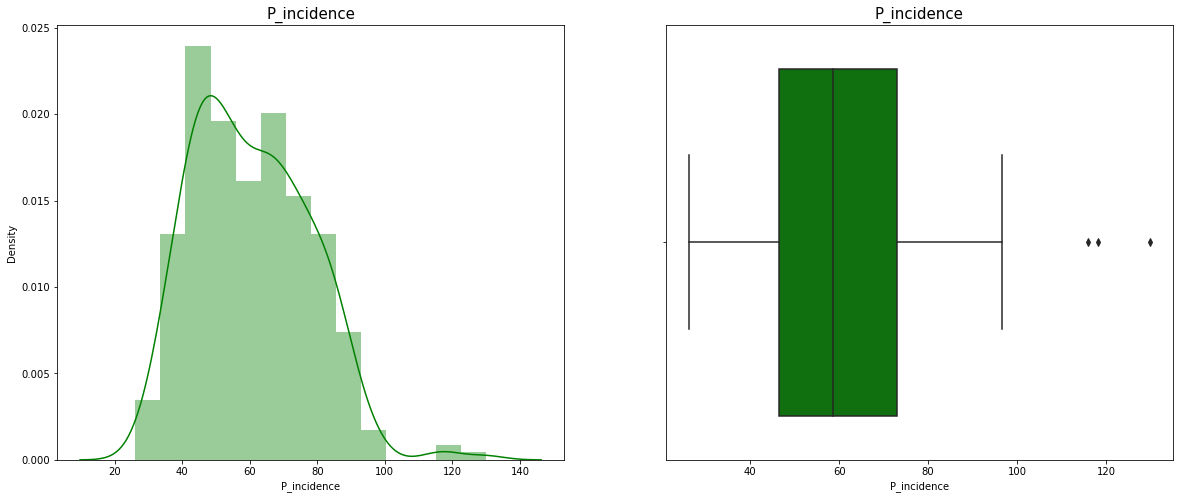

In [20]:
plt.figure(figsize =(20,8))
plt.subplot(1,2,1)
plt.title('P_incidence',fontsize=15)
sns.distplot(hd['P_incidence'],color='green')

plt.subplot(1, 2, 2)
plt.title('P_incidence',fontsize=15)
sns.boxplot(hd['P_incidence'],color='green')

q25 = np.percentile(hd['P_incidence'],25)
q75 = np.percentile(hd['P_incidence'],75)
IQR = q75 - q25
whiskers = 1.5*IQR
low_wh = q25 - whiskers
hig_wh = q75 + whiskers
outliers = [i for i in hd['P_incidence'] if i < low_wh or i > hig_wh]
print(f'''The number of outliers in P_incidence: {len(outliers)}''')

The number of outliers in P_incidence is 3

Normal distribution with less extreme values

The number of outliers in P_tilt: 13


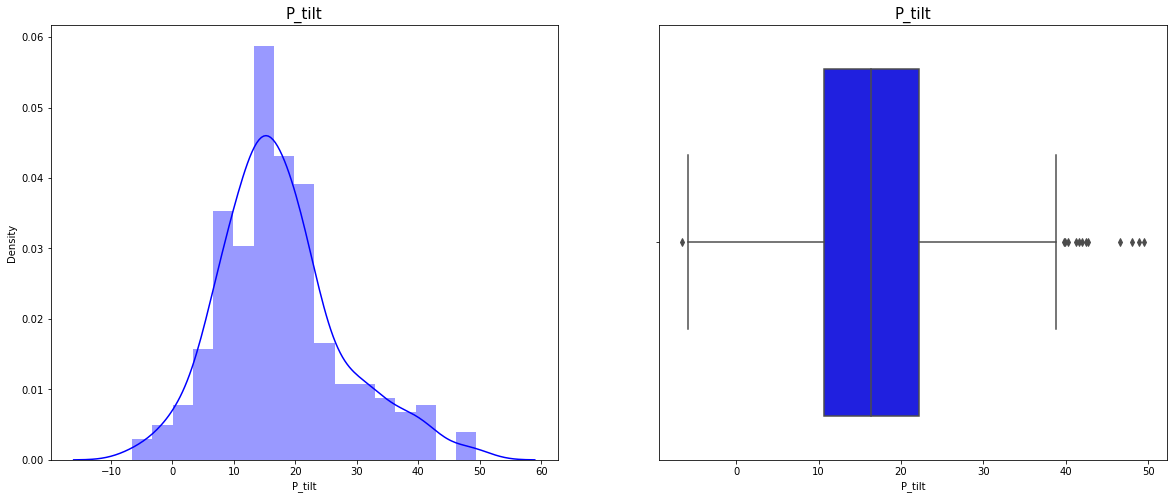

In [21]:
plt.figure(figsize =(20,8))
plt.subplot(1,2,1)
plt.title('P_tilt',fontsize=15)
sns.distplot(hd['P_tilt'],color = 'blue')

plt.subplot(1,2,2)
plt.title('P_tilt',fontsize=15)
sns.boxplot(hd['P_tilt'],color = 'blue')

q25 = np.percentile(hd['P_tilt'],25)
q75 = np.percentile(hd['P_tilt'],75)
IQR = q75 - q25
whisker = 1.5*IQR
low_wh = q25 - whisker
hig_wh = q75 + whisker
outliers = [i for i in hd['P_tilt'] if i>hig_wh or i<low_wh]
print(f'''The number of outliers in P_tilt: {len(outliers)}''')

The number of outliers in L_angle: 1


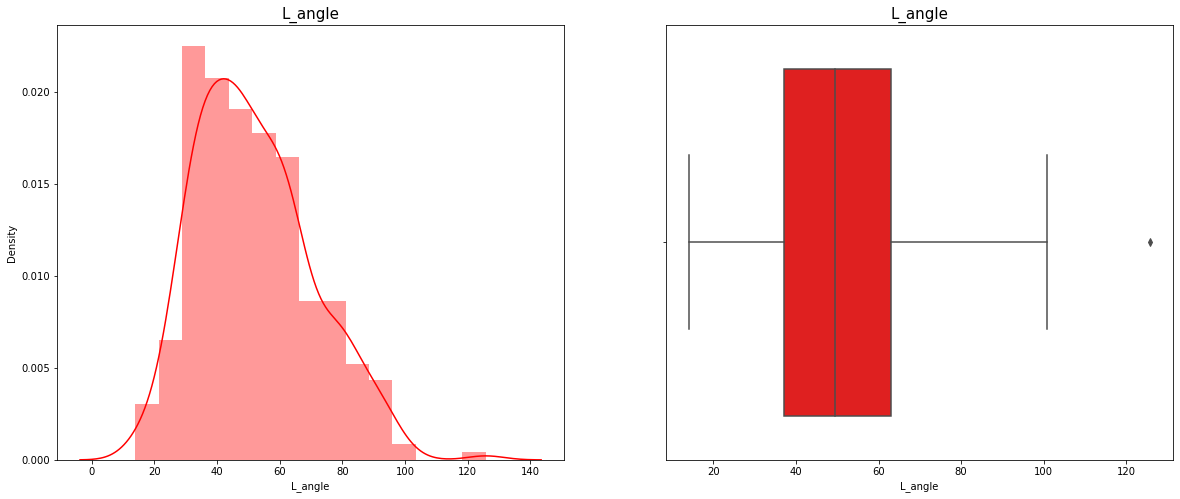

In [22]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('L_angle',fontsize=15)
sns.distplot(hd['L_angle'],color = 'red')

plt.subplot(1,2,2)
plt.title('L_angle',fontsize=15)
sns.boxplot(hd['L_angle'],color = 'red')

q25 = np.percentile(hd['L_angle'],25)
q75 = np.percentile(hd['L_angle'],75)
IQR = q75 - q25
whisker = 1.5*IQR
low_wh = q25 - whisker
hig_wh = q75 + whisker
outliers = [i for i in hd['L_angle'] if i>hig_wh or i<low_wh]
print(f'''The number of outliers in L_angle: {len(outliers)}''')

The number of outliers in S_slope: 1


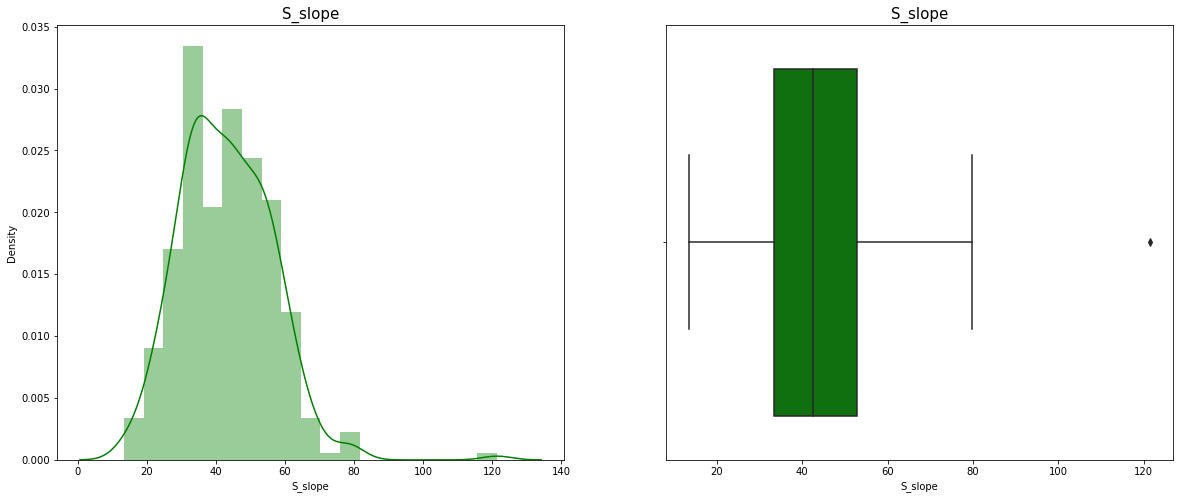

In [23]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('S_slope',fontsize=15)
sns.distplot(hd['S_slope'],color='green')

plt.subplot(1,2,2)
plt.title('S_slope',fontsize=15)
sns.boxplot(hd['S_slope'],color='green')

q25 = np.percentile(hd['S_slope'],25)
q75 = np.percentile(hd['S_slope'],75)
IQR = q75 - q25
whisker = 1.5*IQR
low_wh = q25 - whisker
hig_wh = q75 + whisker
outliers = [i for i in hd['S_slope'] if i>hig_wh or i<low_wh]
print(f'''The number of outliers in S_slope: {len(outliers)}''')

The number of outliers in P_radius: 11


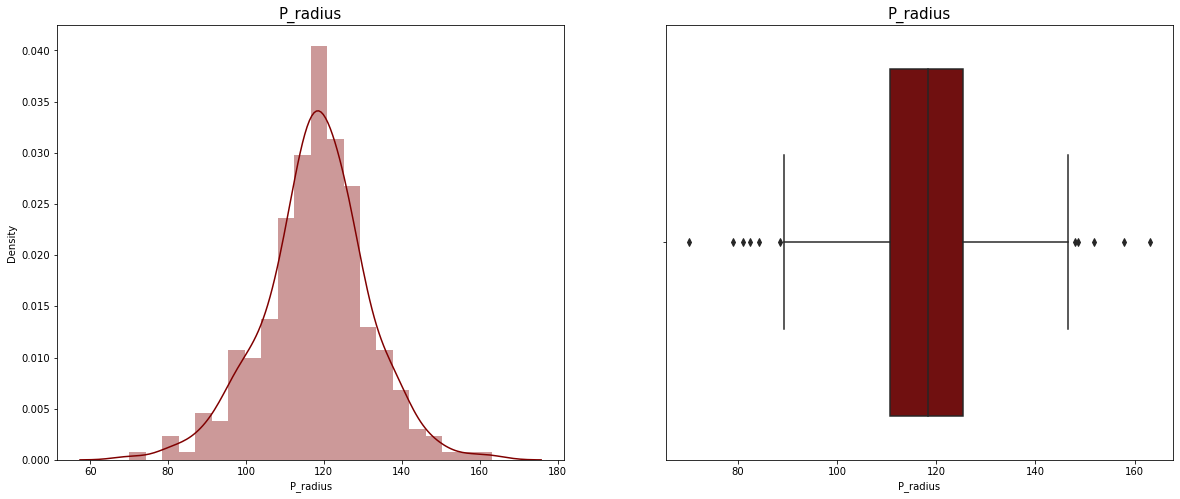

In [24]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('P_radius',fontsize=15)
sns.distplot(hd['P_radius'],color='maroon')

plt.subplot(1,2,2)
plt.title('P_radius',fontsize=15)
sns.boxplot(hd['P_radius'],color='maroon')

q25 = np.percentile(hd['P_radius'],25)
q75 = np.percentile(hd['P_radius'],75)
IQR = q75 - q25
whisker = 1.5*IQR
low_wh = q25 - whisker
hig_wh = q75 + whisker
outliers = [i for i in hd['P_radius'] if i>hig_wh or i<low_wh]
print(f'''The number of outliers in P_radius: {len(outliers)}''')

The number of outliers in S_Degree: 10


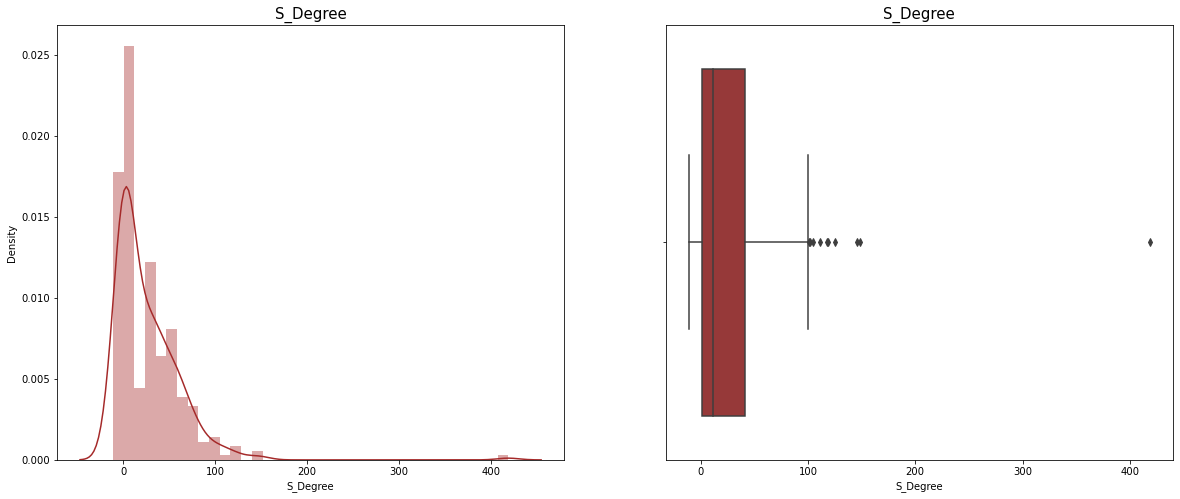

In [25]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('S_Degree',fontsize=15)
sns.distplot(hd['S_Degree'],color='brown')

plt.subplot(1,2,2)
plt.title('S_Degree',fontsize=15)
sns.boxplot(hd['S_Degree'],color='brown')

q25 = np.percentile(hd['S_Degree'],25)
q75 = np.percentile(hd['S_Degree'],75)
IQR = q75 - q25
whisker = 1.5*IQR
low_wh = q25 - whisker
hig_wh = q75 + whisker
outliers = [i for i in hd['S_Degree'] if i>hig_wh or i<low_wh]
print(f'''The number of outliers in S_Degree: {len(outliers)}''')

# Distribution of dependent variable

<AxesSubplot:title={'center':'Class'}, ylabel='Class'>

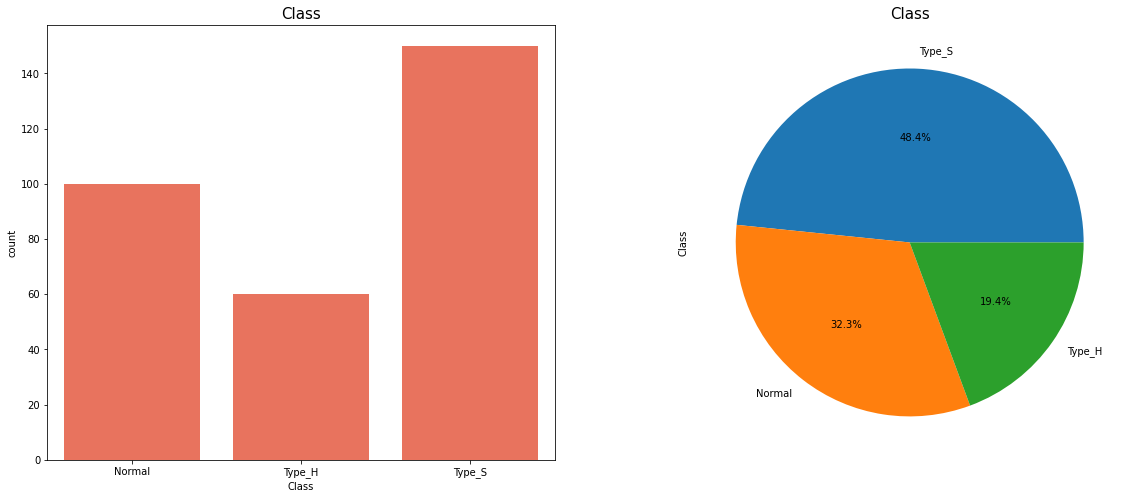

In [26]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Class',fontsize=15)
sns.countplot(hd['Class'],color='Tomato')



plt.subplot(1,2,2)
plt.title('Class',fontsize=15)
hd['Class'].value_counts().plot.pie(autopct='%1.1f%%')

# Bivariate analysis

# Comparing independent variable with Target variable for all attributes

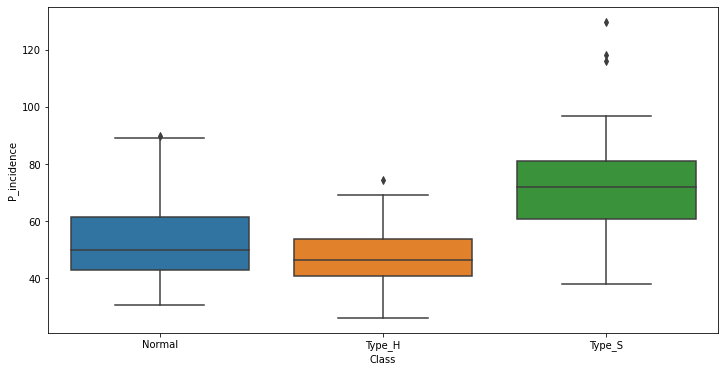

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Class',y='P_incidence',data=hd);

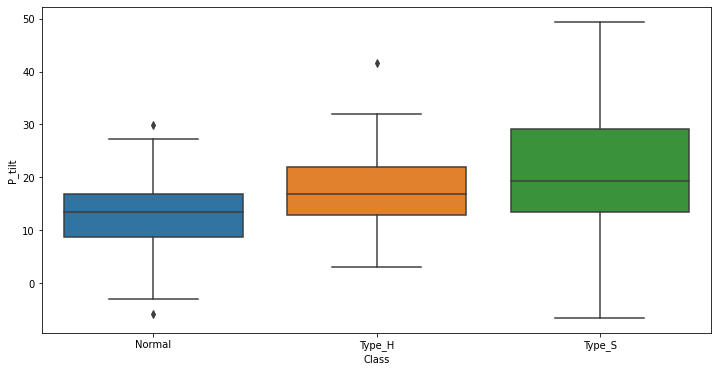

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Class',y='P_tilt',data=hd);

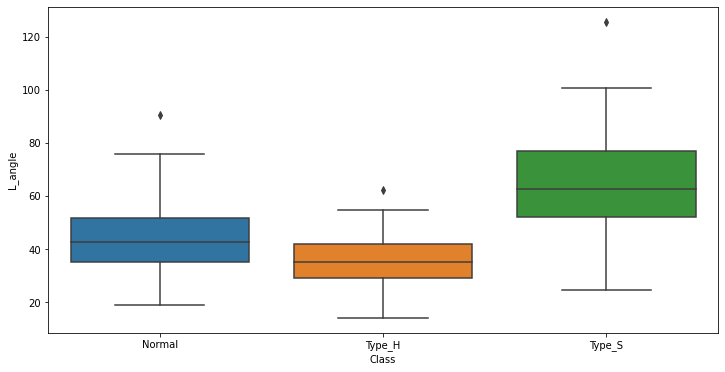

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Class',y='L_angle',data=hd);

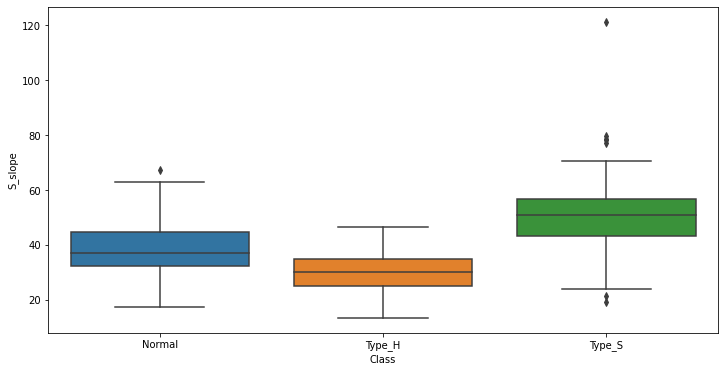

In [30]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Class',y='S_slope',data=hd);

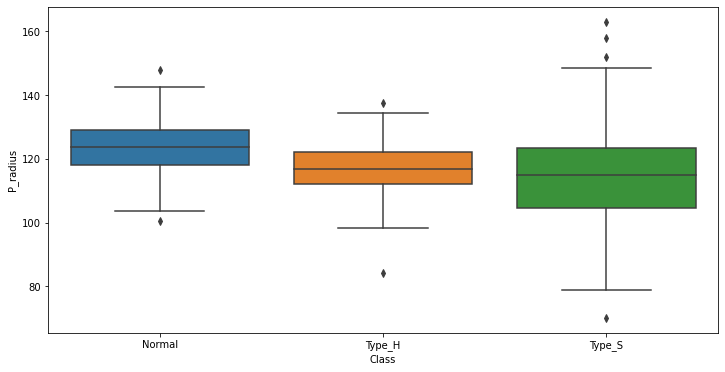

In [31]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Class',y='P_radius',data=hd);

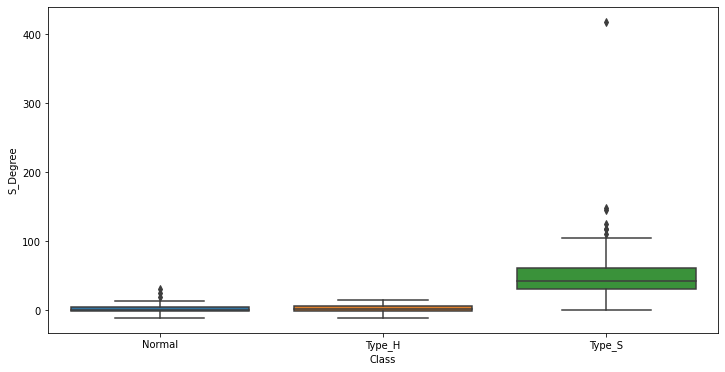

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Class',y='S_Degree',data=hd);

# Multivariate Analysis

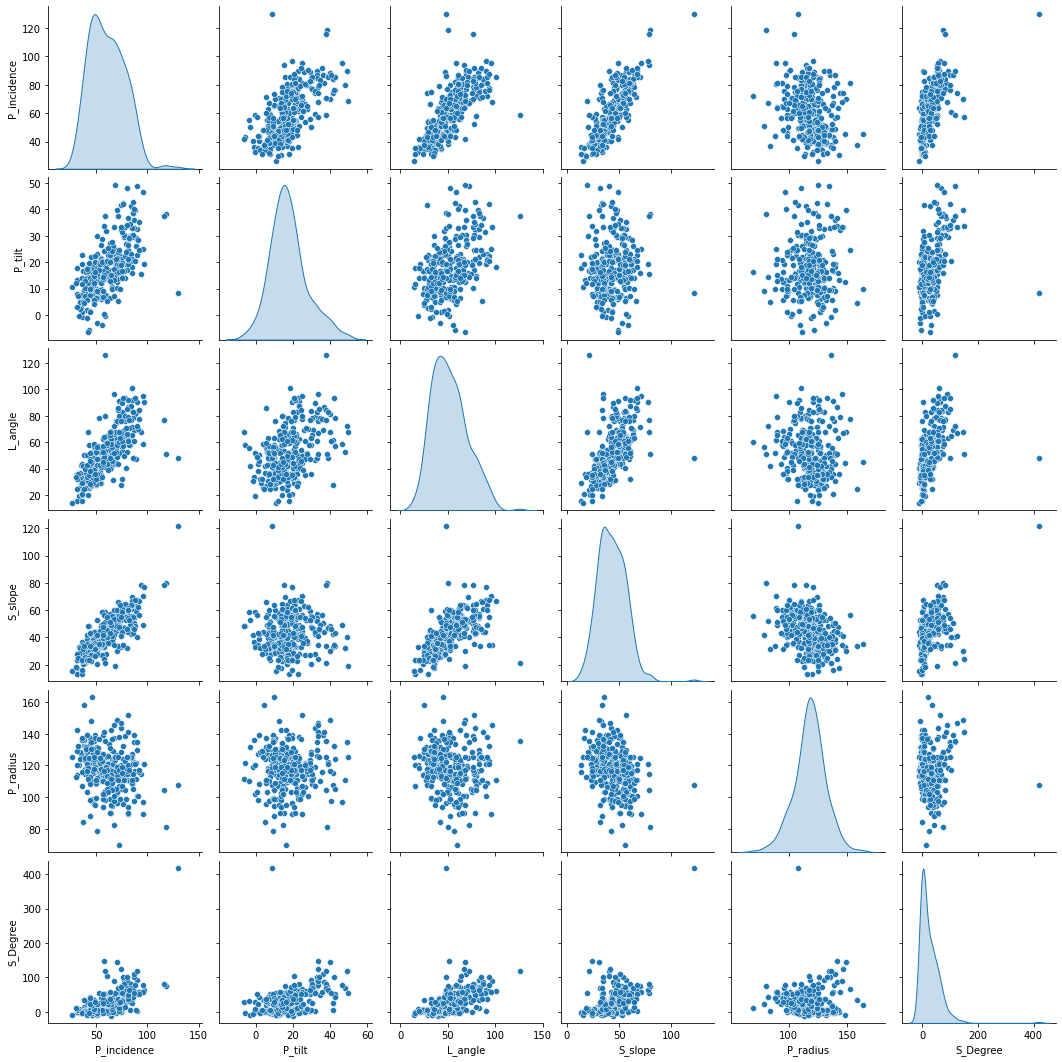

In [33]:
sns.pairplot(hd,diag_kind='kde');

In [34]:
hd.corr()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


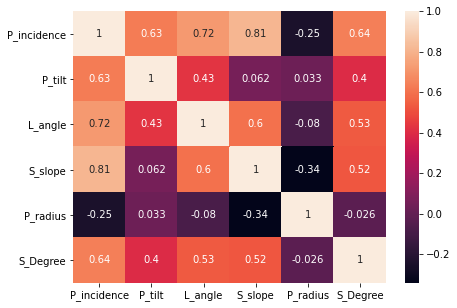

In [35]:
plt.figure(figsize=(7,5))
sns.heatmap(hd.corr(), annot=True);

In [36]:
#using groupby splitting the dataset based on mean value
hd.groupby('Class').mean()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
Class,,,,,,
Normal,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572
Type_H,47.638407,17.398795,35.463524,30.239612,116.474968,2.480251
Type_S,71.514224,20.748038,64.110108,50.766186,114.518810,51.896687


from the above observation it is found that the the mean class values for Type_S type will be more as compared to 'Normal' and 'Type_H'

We can see class type affects each and every independent variables

# 4. Data pre-processing:

In [37]:
hd.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [38]:
# Getting upper and lower quartile values
from scipy import stats
from scipy.stats import zscore
col = ['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']
for i in col:
    q25 = np.percentile(hd[i],25)
    q75 = np.percentile(hd[i],75)
    IQR = q75-q25
    whisker = 1.5*IQR
    low = q25-whisker
    hig = q75+whisker
    outliers = [c for c in hd[i] if c<low or c>hig]
    print(f'''Total number of outliers in {i} before imputing : {len(outliers)}''')

# taking mean of a column without considering the outliers
    hd_in = hd.loc[(hd[i]>=low) & (hd[i]<=hig)]
    mean_val = int(hd_in[i].mean())
    print(f'''mean of {i} is {mean_val}''')

# imputing outliers with mean
    hd[i] = np.where(hd[i]>hig,mean_val,hd[i])
    hd[i] = np.where(hd[i]<low,mean_val,hd[i])
    outliers = [c for c in hd[i] if c<low or c>hig]
    
    print(f'''Total number of outliers in {i} after imputing : {len(outliers)}''')
    print('\n')
    

Total number of outliers in P_incidence before imputing : 3
mean of P_incidence is 59
Total number of outliers in P_incidence after imputing : 0


Total number of outliers in P_tilt before imputing : 13
mean of P_tilt is 16
Total number of outliers in P_tilt after imputing : 0


Total number of outliers in L_angle before imputing : 1
mean of L_angle is 51
Total number of outliers in L_angle after imputing : 0


Total number of outliers in S_slope before imputing : 1
mean of S_slope is 42
Total number of outliers in S_slope after imputing : 0


Total number of outliers in P_radius before imputing : 11
mean of P_radius is 118
Total number of outliers in P_radius after imputing : 0


Total number of outliers in S_Degree before imputing : 10
mean of S_Degree is 22
Total number of outliers in S_Degree after imputing : 0




# Target variable Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
hd['Class'] = le.fit_transform(hd['Class'])
hd.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0


In [40]:
hd.Class.value_counts()

2    150
0    100
1     60
Name: Class, dtype: int64

# Segregate predictors vs target attributes

In [41]:
X = hd.drop('Class',axis=1)  #Independent variables
y = hd['Class']               # Target variable

# Perform normalisation or scaling if required

In [42]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,59.893743,16.139975,26.147921,46.430294,58.691038,72.313279,96.657315
P_tilt,310.0,16.548519,8.404101,-5.845994,10.705427,16.000000,21.021167,38.750670
L_angle,310.0,51.689825,18.071145,14.000000,37.000000,49.562398,62.964777,100.744220
S_slope,310.0,42.697607,12.656481,13.366931,33.347122,42.349084,52.475365,79.695154
P_radius,310.0,118.061242,11.342178,89.307547,111.295804,118.000000,125.196027,146.466001
S_Degree,310.0,22.193516,25.230932,-11.058179,1.603727,11.767934,38.144544,100.292107


In [43]:
from scipy.stats import zscore
X_scaled = X.apply(zscore)

In [44]:
X_scaled.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,-1.327329,0.049553,-0.918802,-1.674307,0.845262,-0.563982
1,-0.308608,0.288410,-0.004898,-0.533804,0.687522,-0.801576
2,-0.963841,-0.906150,-0.265366,-0.576173,0.985479,-0.682778
3,-0.718311,0.107693,-0.204513,-0.936273,0.964252,-0.917200
4,-0.880726,-0.701822,-0.505043,-0.605860,1.070047,-1.015570


In [45]:
X_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,-5.586929e-17,1.001617,-2.094203,-0.835517,-0.074638,0.770733,2.281479
P_tilt,310.0,5.384917e-17,1.001617,-2.669021,-0.696391,-0.065374,0.533059,2.646095
L_angle,310.0,1.876635e-16,1.001617,-2.089008,-0.814203,-0.117915,0.624929,2.718904
S_slope,310.0,-2.438909e-16,1.001617,-2.321190,-0.739985,-0.027582,0.773799,2.927936
P_radius,310.0,-1.037163e-15,1.001617,-2.539211,-0.597449,-0.005408,0.630066,2.508397
S_Degree,310.0,-1.130816e-16,1.001617,-1.320025,-0.817373,-0.413874,0.633223,3.100356


# Check for target balancing. Add your comments

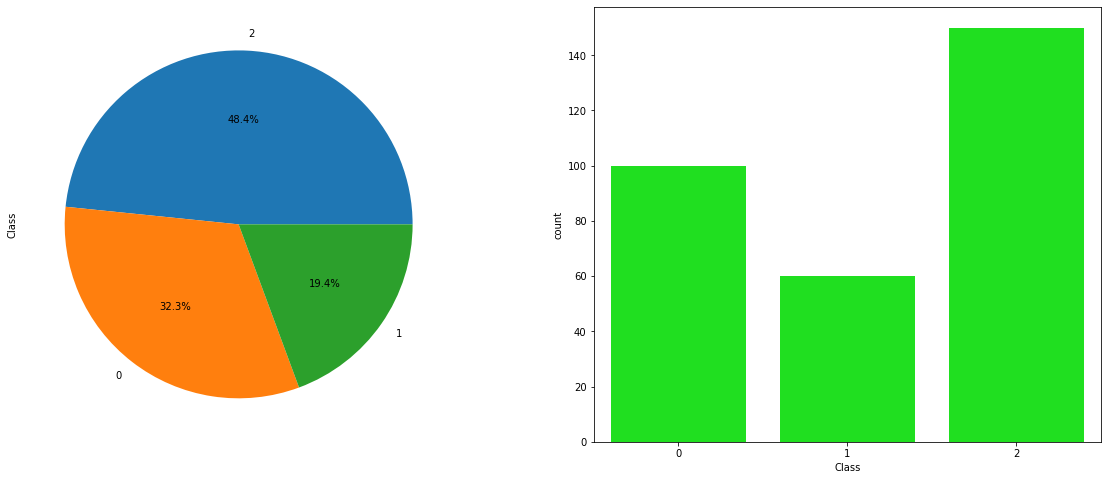

In [46]:
# checking distribution of the target variables
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
hd.Class.value_counts().plot(kind='pie',autopct='%1.1f%%')

plt.subplot(1,2,2)
sns.countplot(hd['Class'],color='Lime');

From the above graph of  Target variable distribution of Class type 'Type_S' has got highest distribution which is 48.4%, followed by 'Normal' which is 32.2% and 'Type_H' which shares 19.4%. There is a imbalance in class variable distribution which affects the model.

# Perform train-test split

In [47]:
# let us the split the model in to 80:20 ratio
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# Model training, testing and tuning:

# Design and train a KNN classifier.

In [48]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)

In [49]:
KNN.fit(X_train,y_train)
y_pre = KNN.predict(X_test)

# Display the classification accuracies for train and test data.

In [50]:
print("Accuracy of the Training data: " ,KNN.score(X_train,y_train))
print("Accuracy of the Testing data: " ,KNN.score(X_test,y_test))

Accuracy of the Training data:  0.8830645161290323
Accuracy of the Testing data:  0.8387096774193549


Training accuracy is 0.88 and testing accuracy is found 0.84

# Display and explain the classification report in detail

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [52]:
cm = confusion_matrix(y_test,y_pre)
cm

array([[16,  1,  1],
       [ 4,  7,  0],
       [ 2,  2, 29]], dtype=int64)

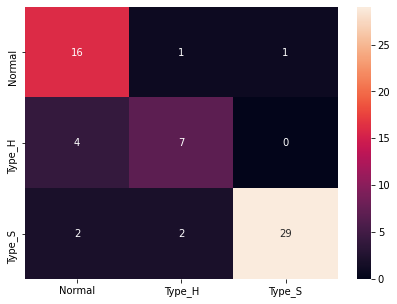

In [53]:
cm1 = pd.DataFrame(cm,index=[i for i in ["Normal","Type_H","Type_S"]],columns=[i for i in ["Normal","Type_H","Type_S"]])
plt.figure(figsize=(7,5))
sns.heatmap(cm1,annot=True);

In [54]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80        18
           1       0.70      0.64      0.67        11
           2       0.97      0.88      0.92        33

    accuracy                           0.84        62
   macro avg       0.80      0.80      0.80        62
weighted avg       0.85      0.84      0.84        62



# Automate the task of finding best values of K for KNN.

In [55]:
# let us check the value of k from 1 to 22
k = [i for i in range(1,23) if i%2!=0]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    y_pre = KNN.predict(X_test)
    print(f'''Accuracy of Training data for k={i} is {KNN.score(X_train,y_train)}''')
    print("\n")
    print(f'''Accuracy of Testing data for k={i} is {KNN.score(X_test,y_test)}''')
    print("\n")
    print(classification_report(y_test,y_pre))

Accuracy of Training data for k=1 is 1.0


Accuracy of Testing data for k=1 is 0.8870967741935484


              precision    recall  f1-score   support

           0       0.81      0.94      0.87        18
           1       0.80      0.73      0.76        11
           2       0.97      0.91      0.94        33

    accuracy                           0.89        62
   macro avg       0.86      0.86      0.86        62
weighted avg       0.89      0.89      0.89        62

Accuracy of Training data for k=3 is 0.9112903225806451


Accuracy of Testing data for k=3 is 0.8548387096774194


              precision    recall  f1-score   support

           0       0.76      0.89      0.82        18
           1       0.70      0.64      0.67        11
           2       0.97      0.91      0.94        33

    accuracy                           0.85        62
   macro avg       0.81      0.81      0.81        62
weighted avg       0.86      0.85      0.86        62

Accuracy of Training da

# Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model.


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection

In [1]:
LR_model = LogisticRegression()
KNN_model = KNeighborsClassifier()
GN_model = GaussianNB()
SVM_linear_model = SVC(kernel='linear')
SVM_rbf_model = SVC()
SVM_poly_model = SVC(kernel='poly')

NameError: name 'LogisticRegression' is not defined

In [58]:
seed=10
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-linear',SVM_linear_model))
models.append(('SVM-rbf',SVM_rbf_model))
models.append(('SVM-poly',SVM_poly_model))

results = []
names = []
scoring = 'accuracy'

for name,model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=seed,shuffle=True)
    cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f'''Model:{name}, Mean:{round(cv_results.mean(),3)}, Standard deviation:{round(cv_results.std(),3)}''')

Model:LR, Mean:0.803, Standard deviation:0.051
Model:KNN, Mean:0.813, Standard deviation:0.057
Model:NB, Mean:0.829, Standard deviation:0.068
Model:SVM-linear, Mean:0.848, Standard deviation:0.06
Model:SVM-rbf, Mean:0.842, Standard deviation:0.047
Model:SVM-poly, Mean:0.855, Standard deviation:0.06


From the above it is observed that SVM_Poly model has got highest accuracy (0.855) and lower standard deviation (0.06). SVM Polynomial kernel is a comparitevly good model.

# will check accuracy and standard deviation with  the 'scaled data'

In [59]:
LR_model = LogisticRegression()
KNN_model = KNeighborsClassifier()
GN_model = GaussianNB()
SVM_linear_model = SVC(kernel='linear')
SVM_rbf_model = SVC()
SVM_poly_model = SVC(kernel='poly')

In [60]:
seed=15
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-linear',SVM_linear_model))
models.append(('SVM-rbf',SVM_rbf_model))
models.append(('SVM-poly',SVM_poly_model))

results = []
names = []
scoring = 'accuracy'

for name,model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=seed,shuffle=True)
    cv_results = model_selection.cross_val_score(model,X_scaled,y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f'''Model:{name}, Mean:{round(cv_results.mean(),3)}, Standard deviation:{round(cv_results.std(),3)}''')

Model:LR, Mean:0.855, Standard deviation:0.053
Model:KNN, Mean:0.803, Standard deviation:0.07
Model:NB, Mean:0.823, Standard deviation:0.054
Model:SVM-linear, Mean:0.858, Standard deviation:0.065
Model:SVM-rbf, Mean:0.852, Standard deviation:0.074
Model:SVM-poly, Mean:0.784, Standard deviation:0.099


# Conclusion and improvisation

# conclusion on the results

# suggestions or improvements

# Project part-2 (Banking and Finance)

# 1. Import and warehouse data:

# Import all the given datasets and explore shape and size of each.

In [61]:
bd1 = pd.read_csv('Part2 - Data1.csv')
bd1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [62]:
bd2 = pd.read_csv('Part2 -Data2.csv')
bd2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [63]:
bd1.shape
print(f'''The bank dataset of 'part 1' has {bd1.shape[0]} rows and {bd1.shape[1]} attributes''')

The bank dataset of 'part 1' has 5000 rows and 8 attributes


In [64]:
bd2.shape
print(f'''The bank dataset of 'part 2' has {bd2.shape[0]} rows and {bd2.shape[1]} attributes''')

The bank dataset of 'part 2' has 5000 rows and 7 attributes


# Merge all datasets onto one and explore final shape and size

In [65]:
# combining two datframe 
bd = pd.concat([bd1, bd2], axis=1)
bd.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,2,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,3,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,4,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,5,0,0,0,0,1,NaN


There are two 'ID' columns are there one need to deleted

In [66]:
# deleting duplicate ID
bd = bd.T.drop_duplicates().T
bd.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1.0,25.0,1.0,49.0,91107.0,4.0,1.6,1.0,0.0,1.0,0.0,0.0,0.0,NaN
1,2.0,45.0,19.0,34.0,90089.0,3.0,1.5,1.0,0.0,1.0,0.0,0.0,0.0,NaN
2,3.0,39.0,15.0,11.0,94720.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
3,4.0,35.0,9.0,100.0,94112.0,1.0,2.7,2.0,0.0,0.0,0.0,0.0,0.0,NaN
4,5.0,35.0,8.0,45.0,91330.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,NaN


In [67]:
bd.shape
print(f'''The final bank dataset has {bd.shape[0]} rows and {bd.shape[1]} attributes after merging''')

The final bank dataset has 5000 rows and 14 attributes after merging


In [68]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   float64
 1   Age                  5000 non-null   float64
 2   CustomerSince        5000 non-null   float64
 3   HighestSpend         5000 non-null   float64
 4   ZipCode              5000 non-null   float64
 5   HiddenScore          5000 non-null   float64
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   float64
 8   Mortgage             5000 non-null   float64
 9   Security             5000 non-null   float64
 10  FixedDepositAccount  5000 non-null   float64
 11  InternetBanking      5000 non-null   float64
 12  CreditCard           5000 non-null   float64
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(14)
memory usage: 547.0 KB


# Data cleansing

# Explore and if required correct the datatypes of each attribute

In [69]:
bd.dtypes

ID                     float64
Age                    float64
CustomerSince          float64
HighestSpend           float64
ZipCode                float64
HiddenScore            float64
MonthlyAverageSpend    float64
Level                  float64
Mortgage               float64
Security               float64
FixedDepositAccount    float64
InternetBanking        float64
CreditCard             float64
LoanOnCard             float64
dtype: object

In [70]:
# 'float' datatypes are converted into 'int'
int_con = ['ID','Age','CustomerSince','HighestSpend','Mortgage']
for i in int_con:
    bd[i] = bd[i].astype('int64')
bd.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                float64
HiddenScore            float64
MonthlyAverageSpend    float64
Level                  float64
Mortgage                 int64
Security               float64
FixedDepositAccount    float64
InternetBanking        float64
CreditCard             float64
LoanOnCard             float64
dtype: object

In [71]:
convert = ['ZipCode','HiddenScore','Level','Security','FixedDepositAccount','InternetBanking','CreditCard','LoanOnCard']
for i in convert:
           bd[i] = bd[i].astype('category')

In [72]:
bd.dtypes

ID                        int64
Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                category
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int64
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
dtype: object

Since, 'HiddenScore','Level','Security','FixedDepositAccount','InternetBanking','CreditCard','LoanOnCard' are categorical variables hence converted.

# Explore for null values in the attributes and if required drop or impute values.

In [73]:
bd.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107.0,4.0,1.6,1.0,0,1.0,0.0,0.0,0.0,NaN
1,2,45,19,34,90089.0,3.0,1.5,1.0,0,1.0,0.0,0.0,0.0,NaN
2,3,39,15,11,94720.0,1.0,1.0,1.0,0,0.0,0.0,0.0,0.0,NaN
3,4,35,9,100,94112.0,1.0,2.7,2.0,0,0.0,0.0,0.0,0.0,NaN
4,5,35,8,45,91330.0,4.0,1.0,2.0,0,0.0,0.0,0.0,1.0,NaN


In [74]:
# checking null values
bd.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [75]:
# checking for '?' in dataset
for value in bd.columns:
    print(value, ':' ,sum(bd[value]=='?'))

ID : 0
Age : 0
CustomerSince : 0
HighestSpend : 0
ZipCode : 0
HiddenScore : 0
MonthlyAverageSpend : 0
Level : 0
Mortgage : 0
Security : 0
FixedDepositAccount : 0
InternetBanking : 0
CreditCard : 0
LoanOnCard : 0


From the above two observations there are no question ticks or missing entries in any column found except 20 entries in 'LoanOnCard' attribute. Since,it is a categorical variable we canot replace it with mean value. Anyhow it is a large dataset let us delete these 20 rows of missing values.

In [76]:
#dropping null values
bd.dropna(axis=0,inplace=True)

In [77]:
# since, the 'ID' is just a serial number it is not having any significance in the dataset, hence dropping
bd.drop('ID',axis=1,inplace=True)

In [78]:
# checking once again for missing entries if any
bd.isnull().sum()

Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [79]:
# checking once again the information of the dataset for ensuring hoe many rows are deleted
bd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  4980 non-null   int64   
 1   CustomerSince        4980 non-null   int64   
 2   HighestSpend         4980 non-null   int64   
 3   ZipCode              4980 non-null   category
 4   HiddenScore          4980 non-null   category
 5   MonthlyAverageSpend  4980 non-null   float64 
 6   Level                4980 non-null   category
 7   Mortgage             4980 non-null   int64   
 8   Security             4980 non-null   category
 9   FixedDepositAccount  4980 non-null   category
 10  InternetBanking      4980 non-null   category
 11  CreditCard           4980 non-null   category
 12  LoanOnCard           4980 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 301.6 KB


# 3. Data analysis & visualisation

# Perform detailed statistical analysis on the data.

In [80]:
bd.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,4980.0,NaN,NaN,NaN,45.352610,11.464212,23.0,35.0,45.0,55.000,67.0
CustomerSince,4980.0,NaN,NaN,NaN,20.117671,11.468716,-3.0,10.0,20.0,30.000,43.0
HighestSpend,4980.0,NaN,NaN,NaN,73.852410,46.070090,8.0,39.0,64.0,98.000,224.0
ZipCode,4980.0,467.0,94720.0,167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HiddenScore,4980.0,4.0,1.0,1466.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyAverageSpend,4980.0,NaN,NaN,NaN,1.939536,1.750006,0.0,0.7,1.5,2.525,10.0
Level,4980.0,3.0,1.0,2089.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mortgage,4980.0,NaN,NaN,NaN,56.589759,101.836758,0.0,0.0,0.0,101.000,635.0
Security,4980.0,2.0,0.0,4460.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FixedDepositAccount,4980.0,2.0,0.0,4678.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
bd.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4980.0,45.352610,11.464212,23.0,35.0,45.0,55.000,67.0
CustomerSince,4980.0,20.117671,11.468716,-3.0,10.0,20.0,30.000,43.0
HighestSpend,4980.0,73.852410,46.070090,8.0,39.0,64.0,98.000,224.0
MonthlyAverageSpend,4980.0,1.939536,1.750006,0.0,0.7,1.5,2.525,10.0
Mortgage,4980.0,56.589759,101.836758,0.0,0.0,0.0,101.000,635.0


# univariate, bivariate and multivariate analysis 

The number of outliers in 'Age' attribute are  0


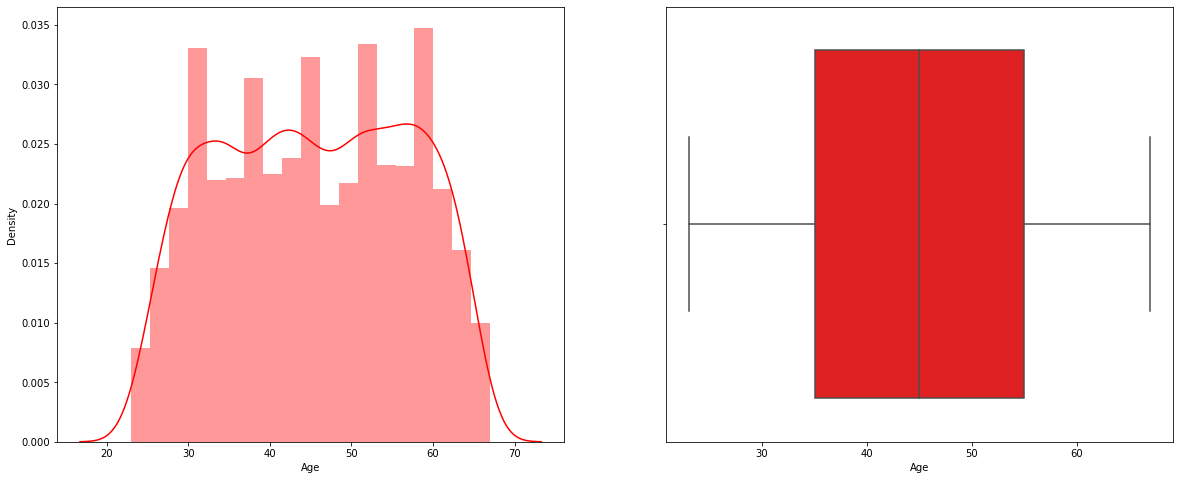

In [82]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(bd['Age'],color='red');

plt.subplot(1,2,2)
sns.boxplot(bd['Age'],color='red');

q25 = np.percentile(bd.Age,25)
q75 = np.percentile(bd.Age,75)
IQR = q75-q25
IQR
whiskers = 1.5*IQR
lower = q25-whiskers
higher = q75+whiskers
outlier = [i for i in bd.Age if i<=lower or i>=higher]
print(f'''The number of outliers in 'Age' attribute are  {len(outlier)}''')

Found no otliers in 'Age' attribute.
Graph shows that age group of the customer from 25 to 65 present in the dataset.
Data is normally distributed with no outliers.

The number of outliers in 'CustomerSince' attribute are 0


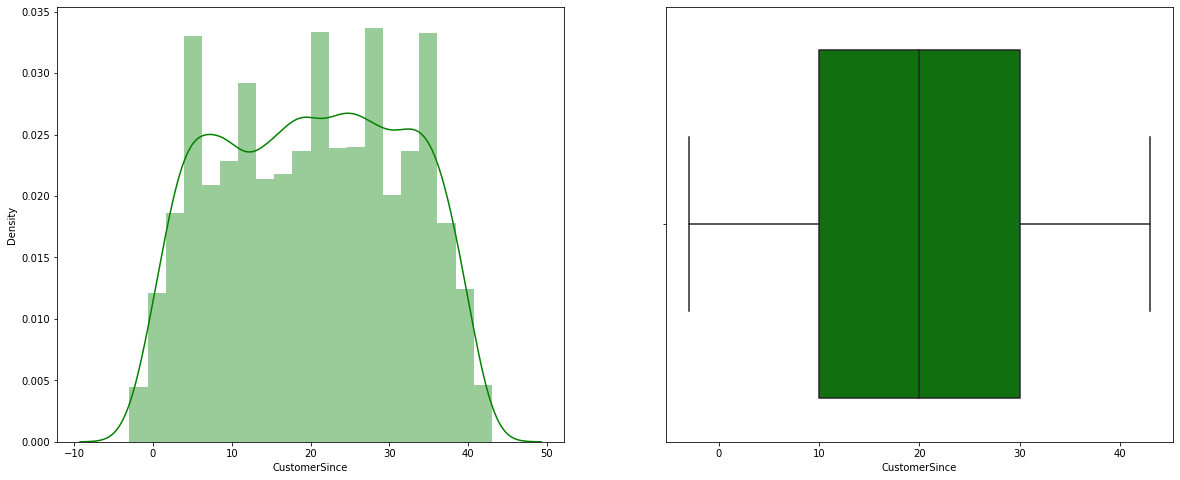

In [83]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(bd['CustomerSince'],color='green');

plt.subplot(1,2,2)
sns.boxplot(bd['CustomerSince'],color='green');

q25 = np.percentile(bd.CustomerSince,25)
q75 = np.percentile(bd.CustomerSince,75)
IQR = q75-q25
IQR
whiskers = 1.5*IQR
lower = q25-whiskers
higher = q75+whiskers
outlier = [i for i in bd.CustomerSince if i<=lower or i>=higher]
print(f'''The number of outliers in 'CustomerSince' attribute are {len(outlier)}''')

'CustomerSince' attribute also found normally distributed with no outliers.

The number of outliers in 'HighestSpend' attribute are 96


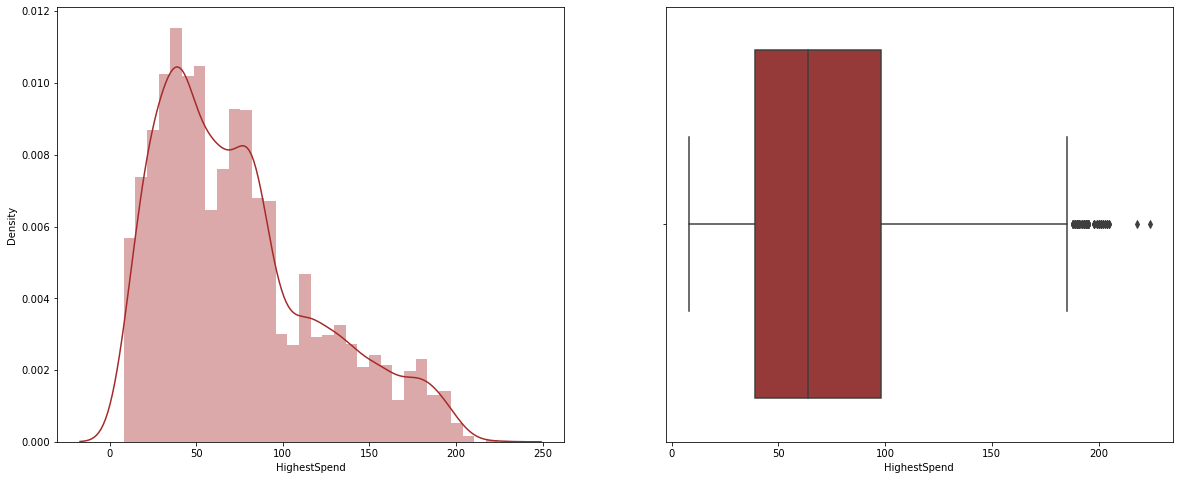

In [84]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(bd['HighestSpend'],color='brown');

plt.subplot(1,2,2)
sns.boxplot(bd['HighestSpend'],color='brown');

q25 = np.percentile(bd.HighestSpend,25)
q75 = np.percentile(bd.HighestSpend,75)
IQR = q75-q25
IQR
whiskers = 1.5*IQR
lower = q25-whiskers
higher = q75+whiskers
outlier = [i for i in bd.HighestSpend if i<=lower or i>=higher]
print(f'''The number of outliers in 'HighestSpend' attribute are {len(outlier)}''')

Data is not normally distributed in 'HighestSpend' attribute with large number of outliers of 96. 

The number of outliers in 'MonthlyAverageSpend' attribute are 324


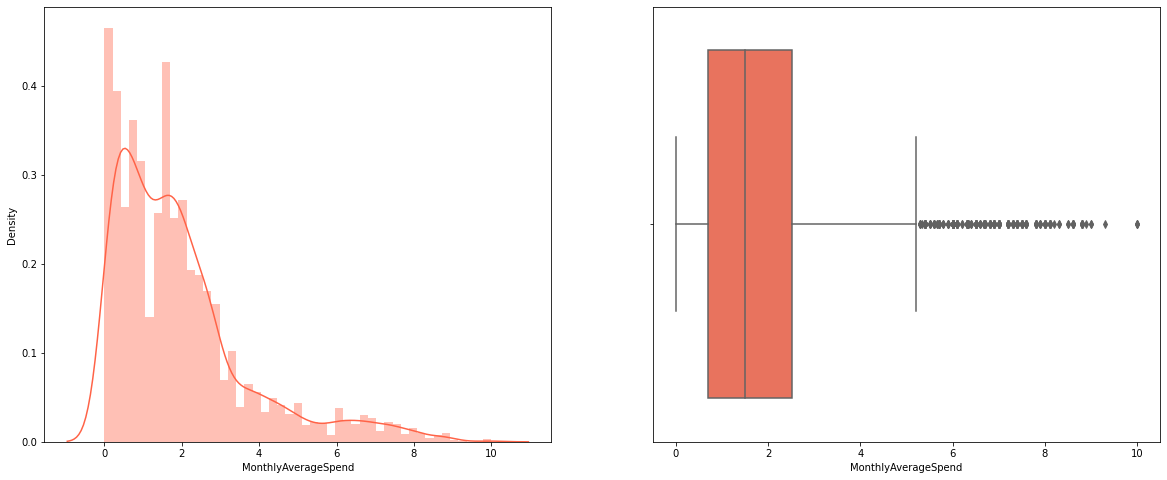

In [85]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(bd['MonthlyAverageSpend'],color='tomato');

plt.subplot(1,2,2)
sns.boxplot(bd['MonthlyAverageSpend'],color='tomato');

q25 = np.percentile(bd.MonthlyAverageSpend,25)
q75 = np.percentile(bd.MonthlyAverageSpend,75)
IQR = q75-q25
IQR
whiskers = 1.5*IQR
lower = q25-whiskers
higher = q75+whiskers
outlier = [i for i in bd.MonthlyAverageSpend if i<=lower or i>=higher]
print(f'''The number of outliers in 'MonthlyAverageSpend' attribute are {len(outlier)}''')

Data is not normally distributed in 'MonthlyAverageSpend' attribute with large number of outliers of 324. All the outliers are on the higher side i.e. away from the whisker.

In [86]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  4980 non-null   int64   
 1   CustomerSince        4980 non-null   int64   
 2   HighestSpend         4980 non-null   int64   
 3   ZipCode              4980 non-null   category
 4   HiddenScore          4980 non-null   category
 5   MonthlyAverageSpend  4980 non-null   float64 
 6   Level                4980 non-null   category
 7   Mortgage             4980 non-null   int64   
 8   Security             4980 non-null   category
 9   FixedDepositAccount  4980 non-null   category
 10  InternetBanking      4980 non-null   category
 11  CreditCard           4980 non-null   category
 12  LoanOnCard           4980 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 301.6 KB


The number of outliers in 'Mortgage' attribute are 291


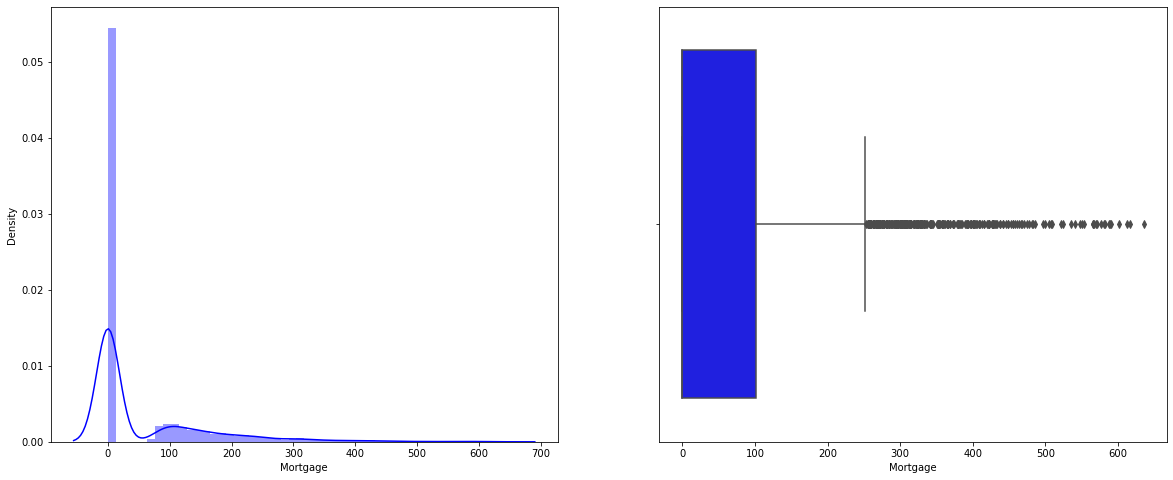

In [87]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(bd['Mortgage'],color='blue');

plt.subplot(1,2,2)
sns.boxplot(bd['Mortgage'],color='blue');

q25 = np.percentile(bd.Mortgage,25)
q75 = np.percentile(bd.Mortgage,75)
IQR = q75-q25
IQR
whiskers = 1.5*IQR
lower = q25-whiskers
higher = q75+whiskers
outlier = [i for i in bd. Mortgage if i<=lower or i>=higher]
print(f'''The number of outliers in 'Mortgage' attribute are {len(outlier)}''')

Data belongs to 'Mortgage' is normally not normally distributed. It is skewed towards right.
There is a huge number of outliers above the upper whiskers can be seen. The number of outliers are 291.


In [88]:
bd.HiddenScore.value_counts()

1.0    1466
2.0    1293
4.0    1215
3.0    1006
Name: HiddenScore, dtype: int64

# will see the distribution of categorical variable:

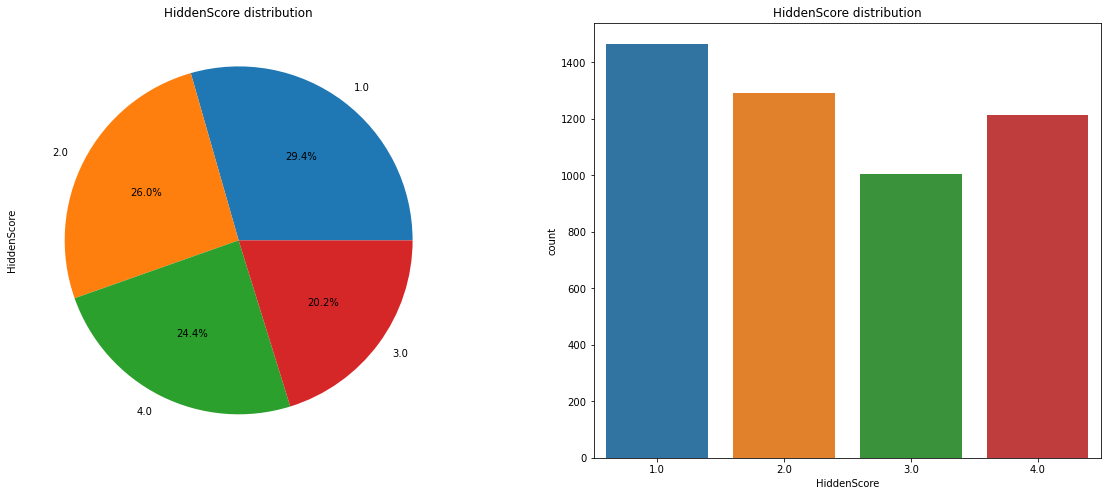

In [89]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("HiddenScore distribution")
bd.HiddenScore.value_counts().plot.pie(autopct='%1.1f%%');

plt.subplot(1,2,2)
plt.title("HiddenScore distribution")
sns.countplot(bd.HiddenScore);

From the above plots it was found that the distribution of type '1' is highest with a percentage of 29.4% and its value count is 1466. And the least one is type '3' with corresponding values 20.2% and 1006.

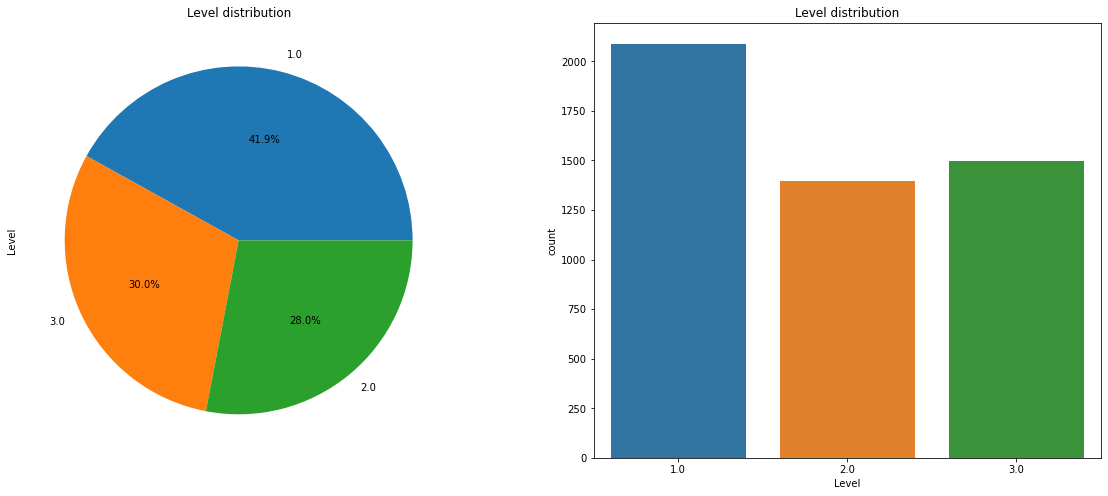

In [90]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Level distribution")
bd.Level.value_counts().plot.pie(autopct='%1.1f%%');

plt.subplot(1,2,2)
plt.title("Level distribution")
sns.countplot(bd.Level);

In Level attribute Level of 'Type1' has highest distribution and 'type3' has least distribution with 28%

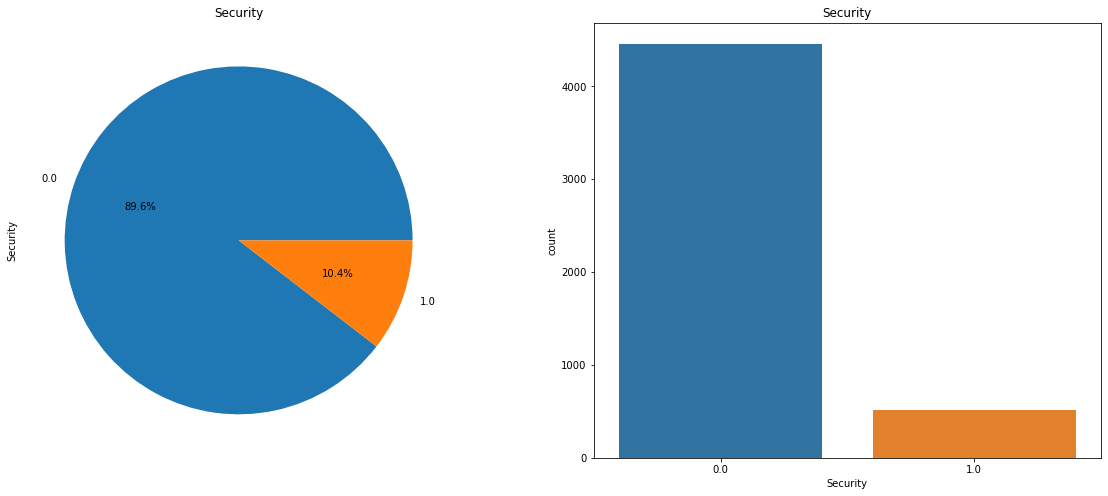

In [91]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Security")
bd.Security.value_counts().plot.pie(autopct='%1.1f%%');

plt.subplot(1,2,2)
plt.title("Security")
sns.countplot(bd.Security);

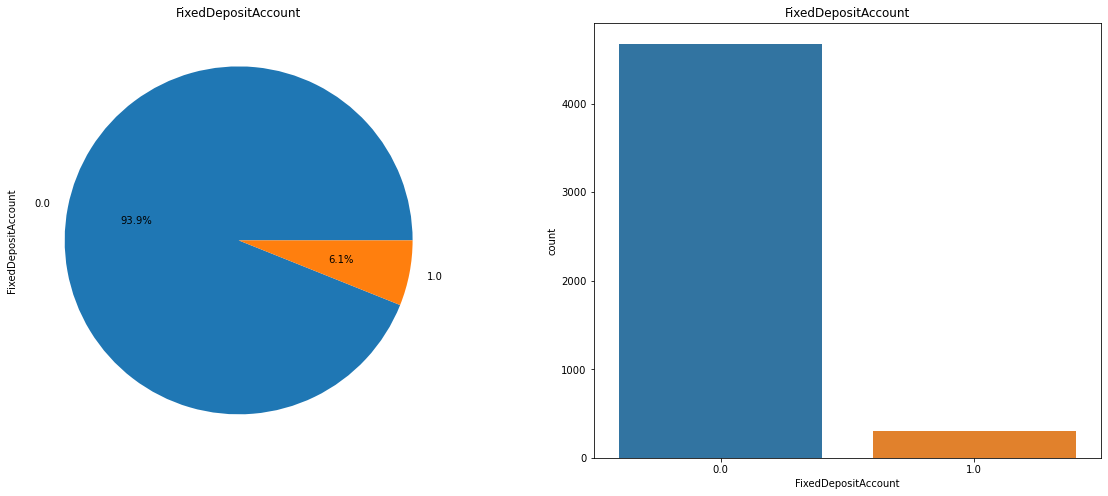

In [92]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("FixedDepositAccount")
bd.FixedDepositAccount.value_counts().plot.pie(autopct='%1.1f%%');

plt.subplot(1,2,2)
plt.title("FixedDepositAccount")
sns.countplot(bd.FixedDepositAccount);

Since the categorical values are masked, 'FixedDepositAccount' contains 94% of type '0' values and about 6% of type '1'. This data is also normally distributed.

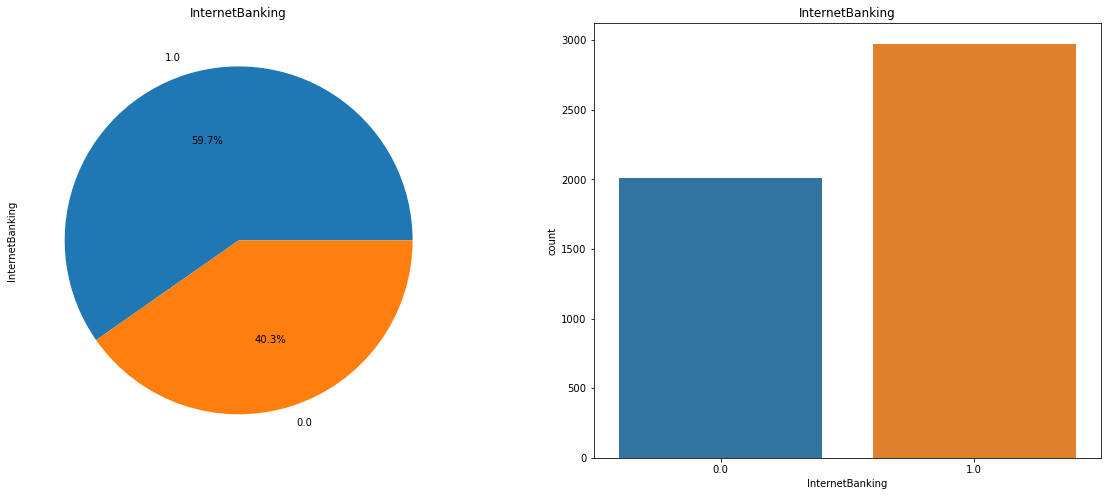

In [93]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("InternetBanking")
bd.InternetBanking.value_counts().plot.pie(autopct='%1.1f%%');

plt.subplot(1,2,2)
plt.title("InternetBanking")
sns.countplot(bd.InternetBanking);

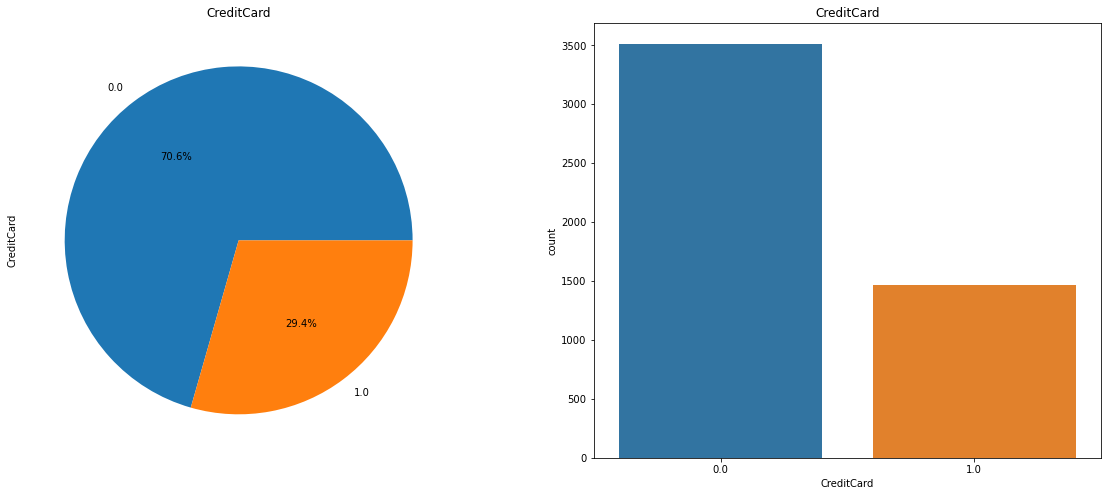

In [94]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("CreditCard")
bd.CreditCard.value_counts().plot.pie(autopct='%1.1f%%');

plt.subplot(1,2,2)
plt.title("CreditCard")
sns.countplot(bd.CreditCard);

70% of the 'CreditCard' attributes contains type '0' values and 30% contains type '1' values. Here also data is not uniformly distributed.

# Bivariate Analysis

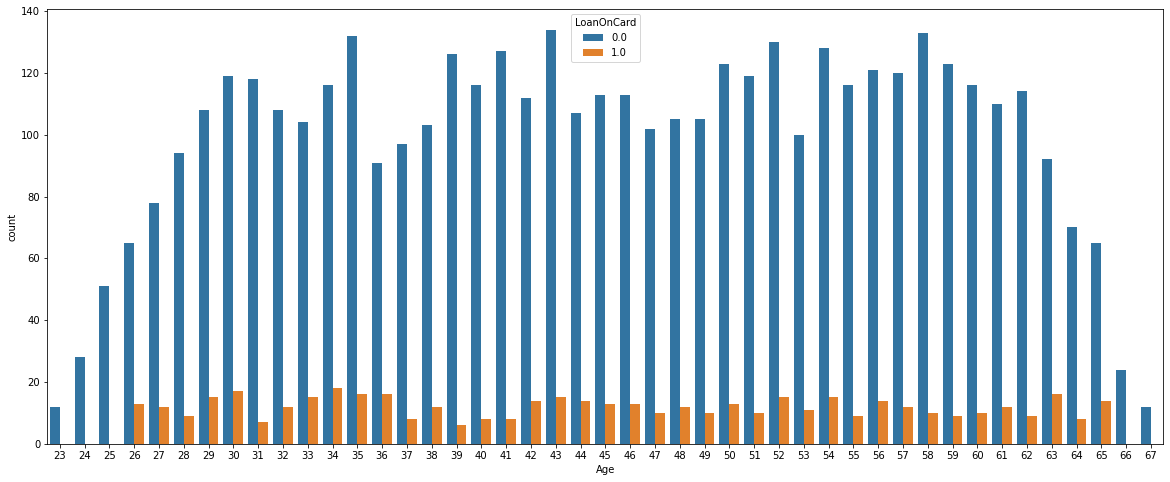

In [95]:
# will compare all the attribute with target attribute one by one
plt.figure(figsize=(20,8))
sns.countplot(hue='LoanOnCard',x='Age',data=bd);

'Age' attribute shows there is a small count of people who bought loan with respect to age.

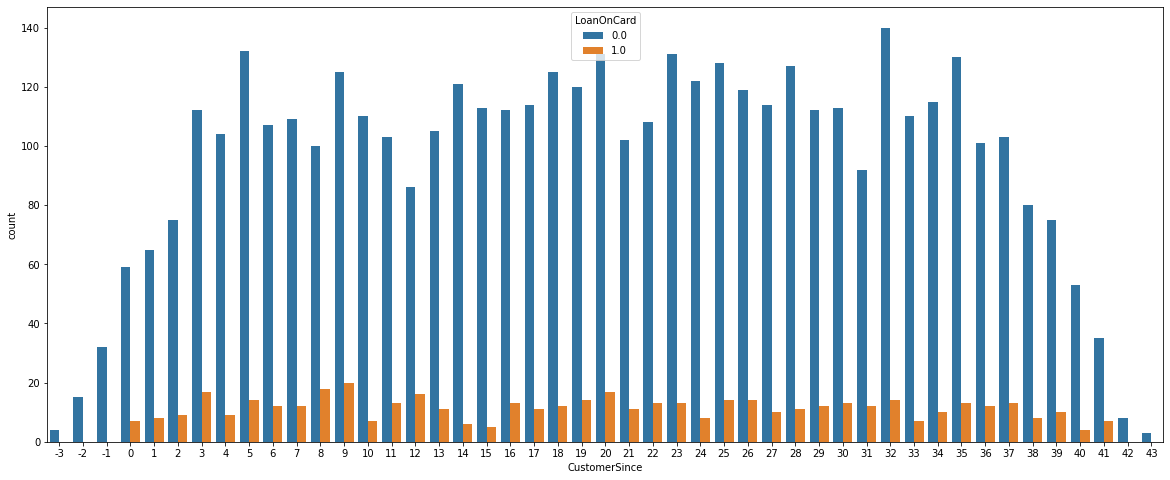

In [96]:
plt.figure(figsize=(20,8))
sns.countplot(hue='LoanOnCard',x='CustomerSince',data=bd);

Since, the units are masked 'CustomerSince' attribute has more number of counts for people with no loan. Also we can notice that the 'customersince' value ranges from 0 to 41.

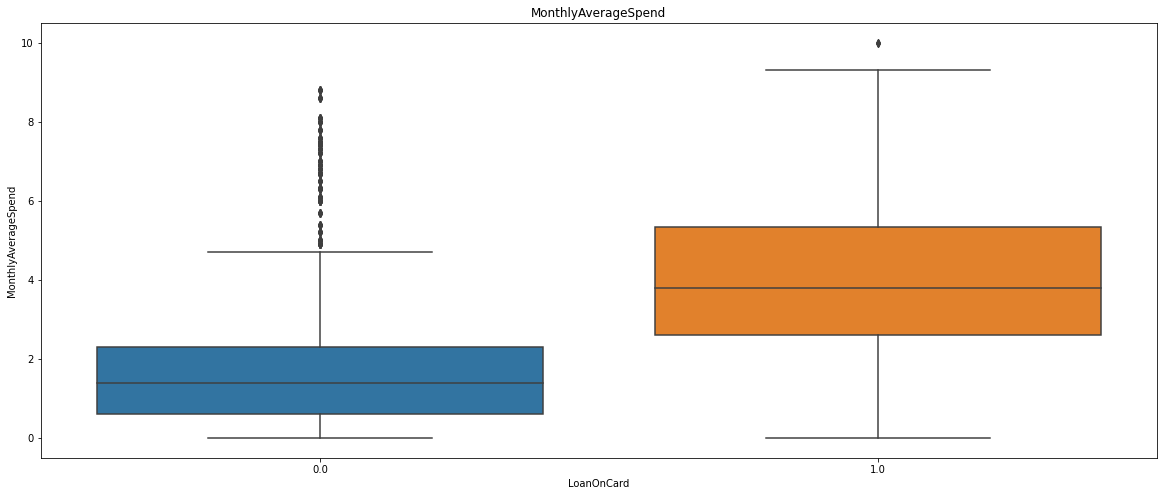

In [97]:
plt.figure(figsize=(20,8))
plt.title('MonthlyAverageSpend')
sns.boxplot(y ='MonthlyAverageSpend', x ='LoanOnCard', data = bd);

Average value of people who have loan spends more than those who does not have loan. We have outliers in people with no loan which implies some people's 'MonthlyAverageSpend' is even more than avg value of people who have not taken loan.

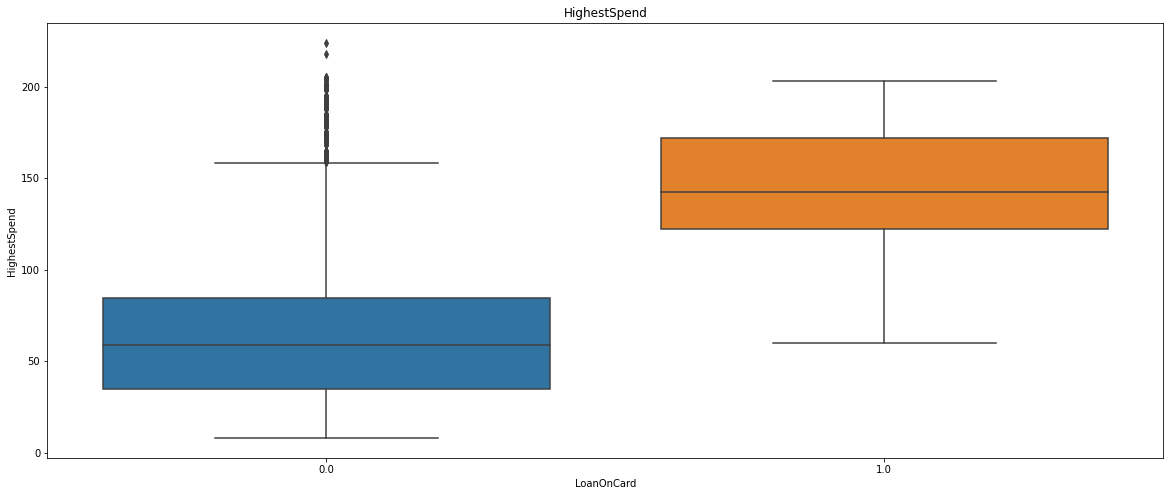

In [98]:
# will observe monthlyavgspend v/s loanoncard
plt.figure(figsize=(20,8))
plt.title('HighestSpend')
sns.boxplot(y ='HighestSpend', x = 'LoanOnCard', data = bd);

'HighestSpend' is more for people with loan in terms of Average value and maximum value. However(outliers), suggests that some people without loan also spending more than avg value of people with loan. 

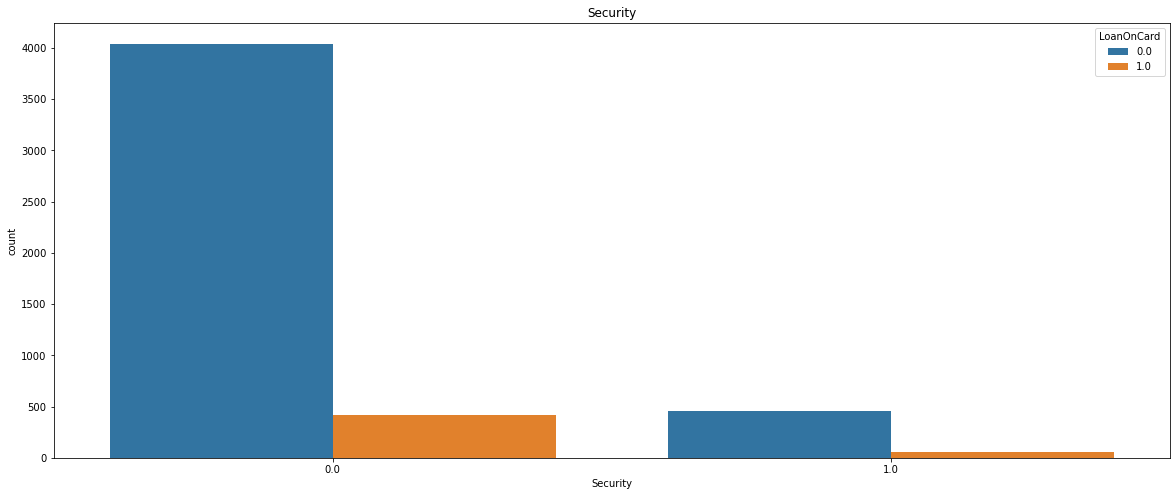

In [99]:
plt.figure(figsize=(20,8))
plt.title('Security')
sns.countplot(x='Security',hue='LoanOnCard',data=bd);

'Security' attribute is comparively less for those who have taken loan.

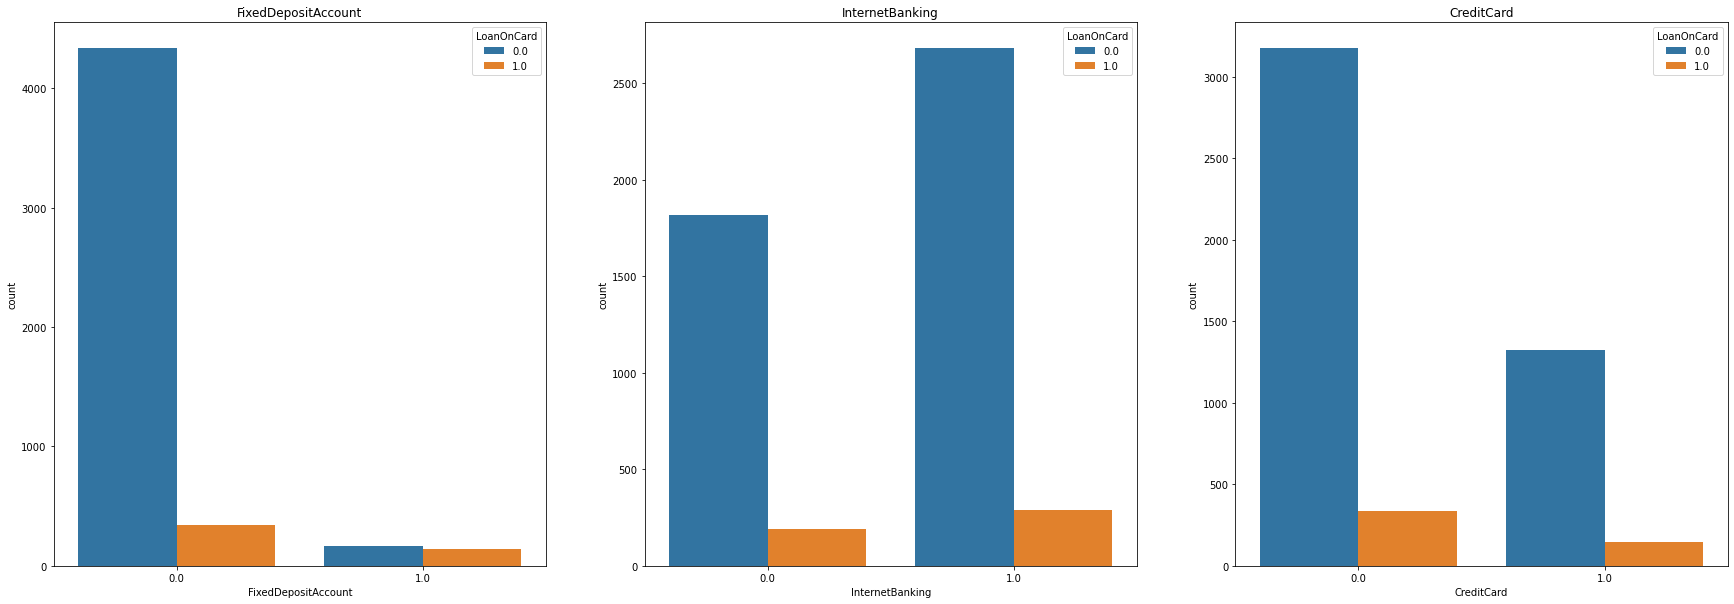

In [100]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.title('FixedDepositAccount')
sns.countplot(x='FixedDepositAccount',hue='LoanOnCard',data=bd);

plt.subplot(1,3,2)
plt.title('InternetBanking')
sns.countplot(x='InternetBanking',hue='LoanOnCard',data=bd);

plt.subplot(1,3,3)
plt.title('CreditCard')
sns.countplot(x='CreditCard',hue='LoanOnCard',data=bd);

From the above observation it was found that large portion of people with 'FixedDeposit' doesn't took loan.
Very less portion of people who took loan has 'FixedDepositAccount'

In terms of InternetBanking users the count of those who took loan comparitevly uses more internet banking. But the majority portion of people falls in the category of non users of internet banking.

Interms of 'CreditCard' very less number of people who took loan uses credit card. Actualy large portion of people who use credit card did not barrow loan. 

# Multivariate Analysis

<Figure size 1440x576 with 0 Axes>

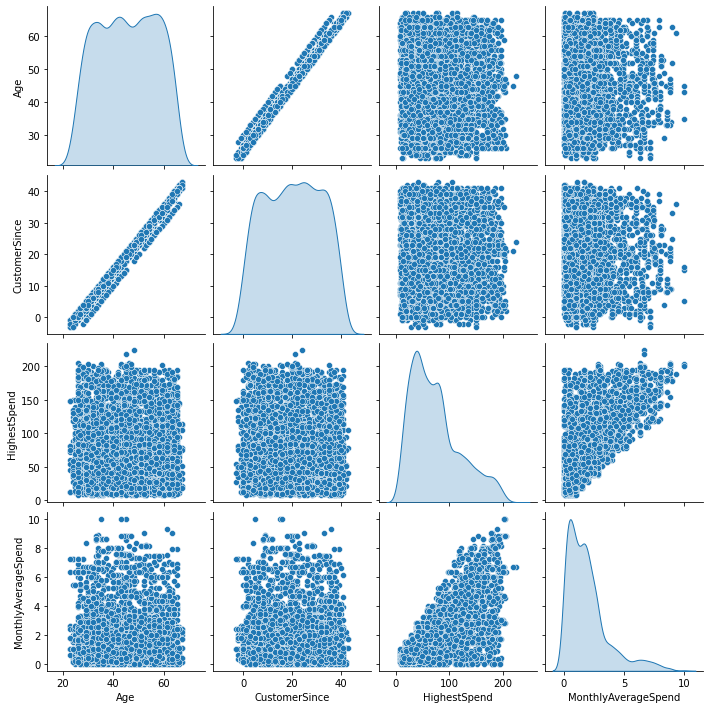

In [101]:
# numerical_attributes = ['Age','CustomerSince','HighestSpend','MonthlyAverageSpend']
plt.figure(figsize=(20,8))
bd_new = bd[['Age','CustomerSince','HighestSpend','MonthlyAverageSpend']]
sns.pairplot(bd_new,diag_kind='kde');

From the above plot it is learnt that the relation between 'Age' and 'CustomerSince' is very positively corelated, 'Age' with respect to 'HighestSpend', 'MonthlyAverageSpend' is not at all related. There is some positive relation can be seen with respect to 'MonthlyAverageSpend' and 'HighestSpend'.

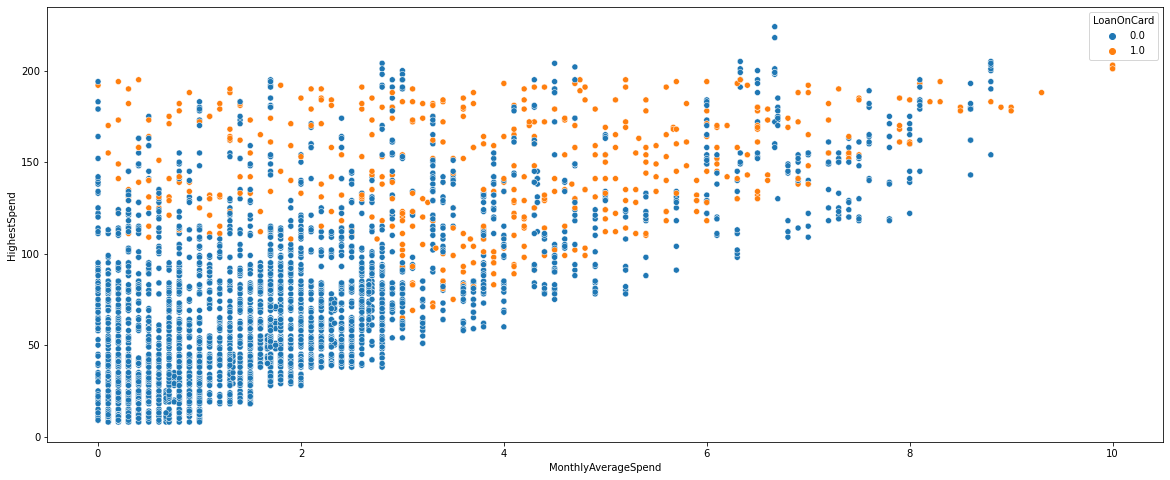

In [102]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=bd.MonthlyAverageSpend, y=bd.HighestSpend,hue=bd.LoanOnCard);

From this plot we can observe that there is a strong positive corelation between 'Highestspend' and 'MonthlyAverageSpend'. Especialy for those who took the loan have comparitvely higher corelation can be observed.

In [103]:
bd.corr().T

,Age,CustomerSince,HighestSpend,MonthlyAverageSpend,Mortgage
Age,1.000000,0.994208,-0.054951,-0.051896,-0.013272
CustomerSince,0.994208,1.000000,-0.046092,-0.049918,-0.011380
HighestSpend,-0.054951,-0.046092,1.000000,0.646109,0.207236
MonthlyAverageSpend,-0.051896,-0.049918,0.646109,1.000000,0.110275
Mortgage,-0.013272,-0.011380,0.207236,0.110275,1.000000


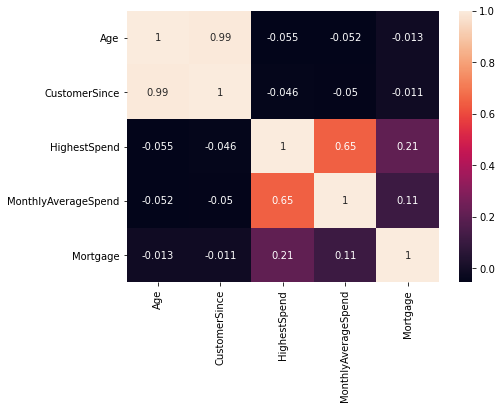

In [104]:
plt.figure(figsize=(7,5))
sns.heatmap(bd.corr(), annot=True);

only the corelation with respect to continious variable can be seen in the graph. 'Age' with respect to 'CustomerSince' is having a good corelation
Highest spend has large correlation with monthly average spend.

# 4. Data pre-processing:

# Segregate predictors vs target attributes

In [105]:
bd.head()

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,34,9,180,93023.0,1.0,8.9,3.0,0,0.0,0.0,0.0,0.0,1.0
10,65,39,105,94710.0,4.0,2.4,3.0,0,0.0,0.0,0.0,0.0,0.0
11,29,5,45,90277.0,3.0,0.1,2.0,0,0.0,0.0,1.0,0.0,0.0
12,48,23,114,93106.0,2.0,3.8,3.0,0,1.0,0.0,0.0,0.0,0.0
13,59,32,40,94920.0,4.0,2.5,2.0,0,0.0,0.0,1.0,0.0,0.0


will consider only those attributes which has positive impact on target variable. Since,'Age','CustomerSince' 'Zipcode', 'InternetBanking', 'CreditCard' might not have impact on Target variable. Let us drop those clumn.

In [106]:
bd.drop(['Age','CustomerSince','ZipCode','InternetBanking','CreditCard'],axis=1,inplace=True)

In [107]:
bd.replace([np.inf, -np.inf], np.nan, inplace=True)

In [108]:
bd.isnull().value_counts()

HighestSpend  HiddenScore  MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  LoanOnCard
False         False        False                False  False     False     False                False         4980
dtype: int64

In [109]:
bd.head()

,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,LoanOnCard
9,180,1.0,8.9,3.0,0,0.0,0.0,1.0
10,105,4.0,2.4,3.0,0,0.0,0.0,0.0
11,45,3.0,0.1,2.0,0,0.0,0.0,0.0
12,114,2.0,3.8,3.0,0,1.0,0.0,0.0
13,40,4.0,2.5,2.0,0,0.0,0.0,0.0


In [110]:
#checking the number of outliers 
outlier_col = ['HighestSpend','MonthlyAverageSpend','Mortgage']
for i in outlier_col:
    q25 = np.percentile(bd[i],25)
    q75 = np.percentile(bd[i],75)
    IQR = q75 - q25
    whiskers = 1.5*IQR
    lower = q25-whiskers
    outer = q75+whiskers
    outlier = [a for a in bd[i] if a<lower or a>outer]
    print(f'''Total number of outliers in {i} before imputing is : {len(outlier)}''')
    print('\n')

# finding the mean value of the corresponding columns excluding outlier
    
    bd_out = bd.loc[(bd[i]>=lower) & (bd[i]<=outer)]
    mean = int(bd_out[i].mean())
    print(f'''Mean value of {i} is {mean}''')
    print('\n')

# Replacing outlier with mean value of the corresponding column    
    bd[i] = np.where(bd[i]>=outer,mean,bd[i])
    bd[i] = np.where(bd[i]<=lower,mean,bd[i])
    
    outlier = [a for a in bd[i] if a<lower or a>outer]
    print(f'''Total number of outliers in {i} after imputing is : {len(outlier)}''')
    print('\n')

Total number of outliers in HighestSpend before imputing is : 96


Mean value of HighestSpend is 71


Total number of outliers in HighestSpend after imputing is : 0


Total number of outliers in MonthlyAverageSpend before imputing is : 324


Mean value of MonthlyAverageSpend is 1


Total number of outliers in MonthlyAverageSpend after imputing is : 0


Total number of outliers in Mortgage before imputing is : 291


Mean value of Mortgage is 38


Total number of outliers in Mortgage after imputing is : 0




In [111]:
# Independent variables
X = bd[['HighestSpend','HiddenScore','MonthlyAverageSpend','Level','Mortgage','Security','FixedDepositAccount']]

# Target variable
y = bd['LoanOnCard']

# Check for target balancing and fix it if found imbalanced

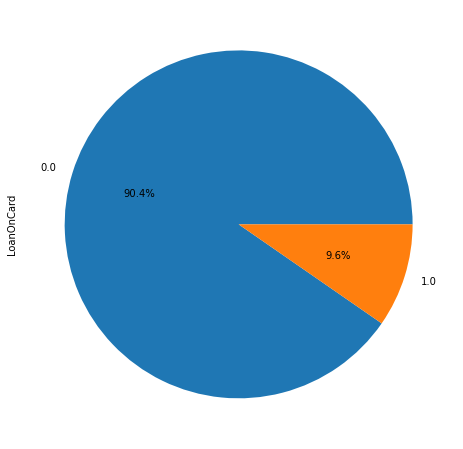

In [112]:
plt.figure(figsize=(20,8))
bd['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%');

Target variable distribution is not balanced. only around 10% of the total population took loan. we have to balance the data by using any of the balancing technique. Will use Synthetic Minority Oversampling Technique(SMOTE) for the present analysis.

# First will classify without balancing later will proceed with the balancing

# Perform train-test split

In [113]:
#will perform 70:30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

# Model training, testing and tuning:

# Logistic regression model

Will proceed with the Logistic Regression Model without balancing:

In [114]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print('Accuracy of training data:',lr.score(X_train, y_train) )
print('Accuracy of testing data:',lr.score(X_test, y_test))

Accuracy of training data: 0.9506597819850832
Accuracy of testing data: 0.9344042838018741


Training accuracy is 88% and Testing accuracy is 87%

# Confusion matrix

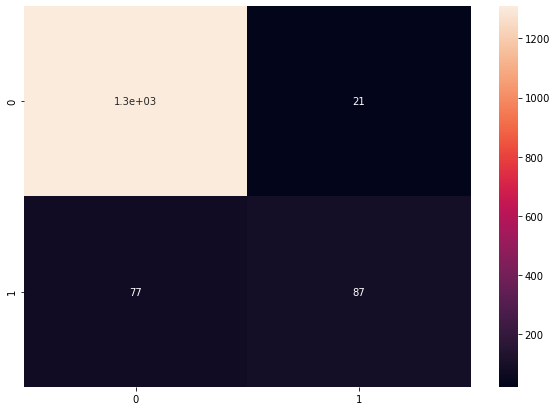

In [115]:
# cm = confusion_matrix(y_test,y_pred)
# plt.figure(figsize=(10,7))
# sns.heatmap(cm,annot=True);

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True);

In [116]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      1330
         1.0       0.81      0.53      0.64       164

    accuracy                           0.93      1494
   macro avg       0.88      0.76      0.80      1494
weighted avg       0.93      0.93      0.93      1494



# Will proceed with balanced data:

In [117]:
# importing balancing libraries
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

In [118]:
# just checking version of the imblearn
import imblearn
print(imblearn.__version__)

0.7.0


In [119]:
# Using SMOTE technique to make the balnced distribution of the target variable
smote_nc=SMOTENC(categorical_features=[1,3,5,6],random_state=42) #specifying categorical column numbers
x_s,y_s=smote_nc.fit_resample(X,y)

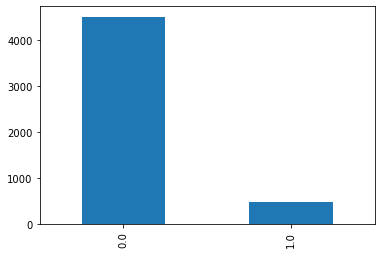

In [120]:
# distribution of target variable before sampling
y.value_counts().plot(kind='bar');

There is a huge imbalance in the values of people who 'took loan' and who did not took.

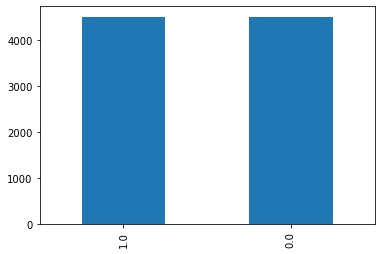

In [121]:
# distribution of target variable after sampling
y_s.value_counts().plot(kind='bar');

Ensuring equal distribution of people who 'took loan' and who did not took.

# Perform train-test split.

In [122]:
# Taking 70:30 as split ratio
X_train, X_test, y_train, y_test = train_test_split(x_s, y_s, test_size=0.3, random_state=50)

# Logistic Regression

In [123]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Accuracy of Training data:',lr.score(X_train, y_train))
print('Accuracy of Testing data:',lr.score(X_test, y_test))

Accuracy of Training data: 0.8820634920634921
Accuracy of Testing data: 0.8677777777777778


Accuracy of the training model is 88.2% and testing accuracy is 86.7%. Model showing similar results for both training and testing accuracy.

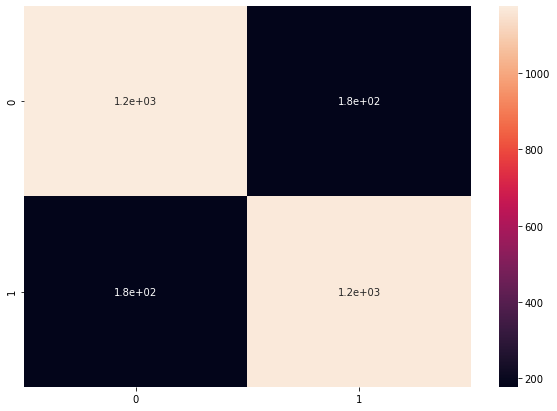

In [124]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True);

In [125]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      1353
         1.0       0.87      0.87      0.87      1347

    accuracy                           0.87      2700
   macro avg       0.87      0.87      0.87      2700
weighted avg       0.87      0.87      0.87      2700



Model is performing well for predicting class both class '0' variable and class '1' variable in terms of accuracy, precision, Recall and f1-score.

# Naive Bayes Model

In [126]:
gm = GaussianNB()
gm.fit(X_train, y_train)
y_pre = gm.predict(X_test)

print('Accuracy for Training data:',gm.score(X_train, y_train))
print('Accuracy for Test data:',gm.score(X_test, y_test))

Accuracy for Training data: 0.8653968253968254
Accuracy for Test data: 0.8481481481481481


Accuracy of Training data and Testing data for Naive Baye's model are 86.3% and 86.3% respectively.

In [127]:
smote_nc=SMOTENC(categorical_features=[1,3,5,6],random_state=42)
x_train_res, y_train_res = smote_nc.fit_resample(X_train, y_train)

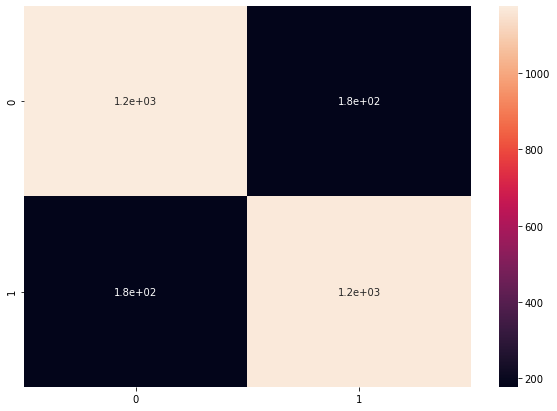

In [128]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True);

In [129]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      1353
         1.0       0.87      0.87      0.87      1347

    accuracy                           0.87      2700
   macro avg       0.87      0.87      0.87      2700
weighted avg       0.87      0.87      0.87      2700



Accuracy of the training  and testing is almost find similar, there is not much deviation is observed.
Even the Model is performing well for predicting class both class '0' variable and class '1' variable in terms of accuracy, precision, Recall and f1-score.

# Best model using K-Fold CV

In [130]:
lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=13)
gn = GaussianNB()
SVM_linear_model = SVC(kernel='linear')
SVM_rbf_model = SVC()
SVM_poly_model = SVC(kernel='poly')

In [131]:
seed = 27
models = []
models.append(('Logistic Rrgression(LR)',lr))
models.append(('K-Nearest neighbour (KNN)',knn))
models.append(('Gaussian-Naive Bayes (NB)',gn))
models.append(('SVM-linear',SVM_linear_model))
models.append(('SVM-rbf',SVM_rbf_model))
models.append(('SVM-poly',SVM_poly_model))
results = []
names = []
scoring = 'accuracy'

for name,model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=seed,shuffle=True)
    cv_results = model_selection.cross_val_score(model,X,y,cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f'''Model:{name}, Mean:{round(cv_results.mean(),3)}, Standard deviation:{round(cv_results.std(),3)}''')

Model:Logistic Rrgression(LR), Mean:0.949, Standard deviation:0.012
Model:K-Nearest neighbour (KNN), Mean:0.923, Standard deviation:0.012
Model:Gaussian-Naive Bayes (NB), Mean:0.904, Standard deviation:0.014
Model:SVM-linear, Mean:0.949, Standard deviation:0.01
Model:SVM-rbf, Mean:0.909, Standard deviation:0.014
Model:SVM-poly, Mean:0.931, Standard deviation:0.011


# 6. Conclusion and improvisation

# Scope for improvement